In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/classification-of-coronary-artery-disease/CAD.csv


In [15]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("/kaggle/input/classification-of-coronary-artery-disease/CAD.csv")

In [5]:
df.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,Normal


In [8]:
df.describe()

,Age,Weight,Length,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,BP,...,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,58.897690,73.831683,164.716172,27.248339,0.297030,0.590759,0.207921,0.033003,0.158416,129.554455,...,19.462046,13.153465,4.230693,140.996700,7562.046205,32.399340,60.148515,221.488449,47.231023,0.620462
std,10.392278,11.987358,9.327661,4.098865,0.457706,0.492507,0.406491,0.178941,0.365734,18.938105,...,15.936475,1.610452,0.458202,3.807885,2413.739323,9.972592,10.182493,60.796199,8.927194,1.132531
min,30.000000,48.000000,140.000000,18.115413,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,...,1.000000,8.900000,3.000000,128.000000,3700.000000,7.000000,32.000000,25.000000,15.000000,0.000000
25%,51.000000,65.000000,158.000000,24.514380,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,...,9.000000,12.200000,3.900000,139.000000,5800.000000,26.000000,52.500000,183.500000,45.000000,0.000000
50%,58.000000,74.000000,165.000000,26.775510,0.000000,1.000000,0.000000,0.000000,0.000000,130.000000,...,15.000000,13.200000,4.200000,141.000000,7100.000000,32.000000,60.000000,210.000000,50.000000,0.000000
75%,66.000000,81.000000,171.000000,29.411765,1.000000,1.000000,0.000000,0.000000,0.000000,140.000000,...,26.000000,14.200000,4.500000,143.000000,8800.000000,39.000000,67.000000,250.000000,55.000000,1.000000
max,86.000000,120.000000,188.000000,40.900658,1.000000,1.000000,1.000000,1.000000,1.000000,190.000000,...,90.000000,17.600000,6.600000,156.000000,18000.000000,60.000000,89.000000,742.000000,60.000000,4.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    object 
 11  CRF                    303 non-null    object 
 12  CVA                    303 non-null    object 
 13  Airway disease         303 non-null    object 
 14  Thyroid Disease        303 non-null    object 
 15  CHF   

In [10]:
#Classfying Features into different lists

def classify_features(df_new):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [12]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

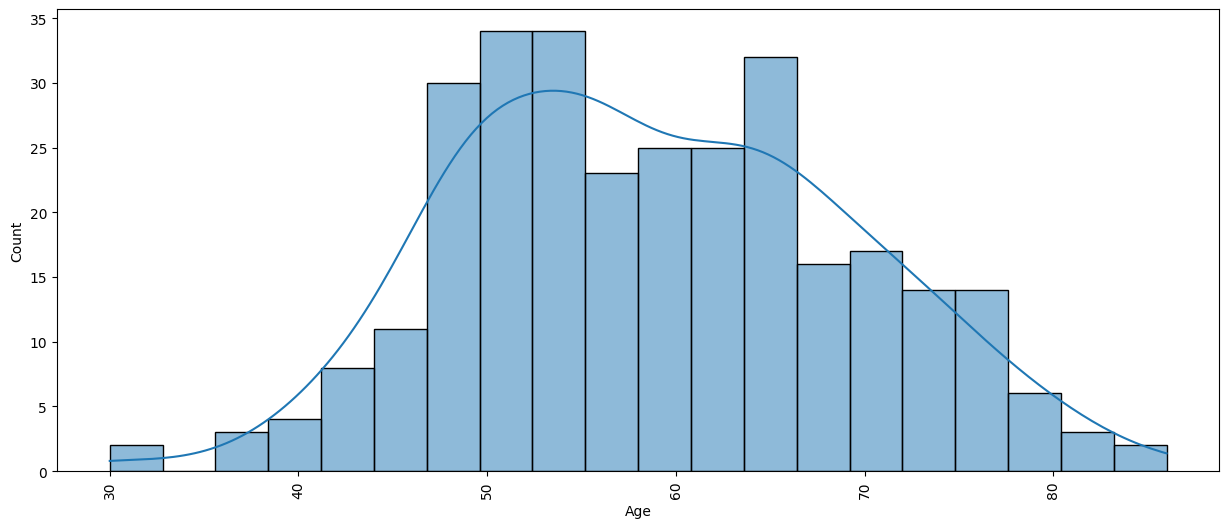

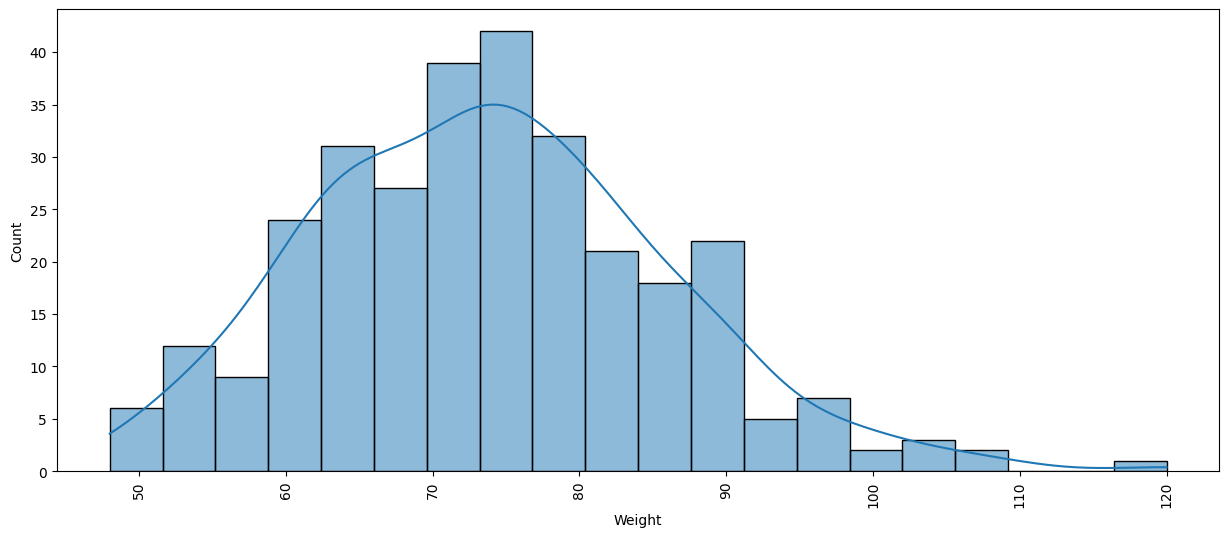

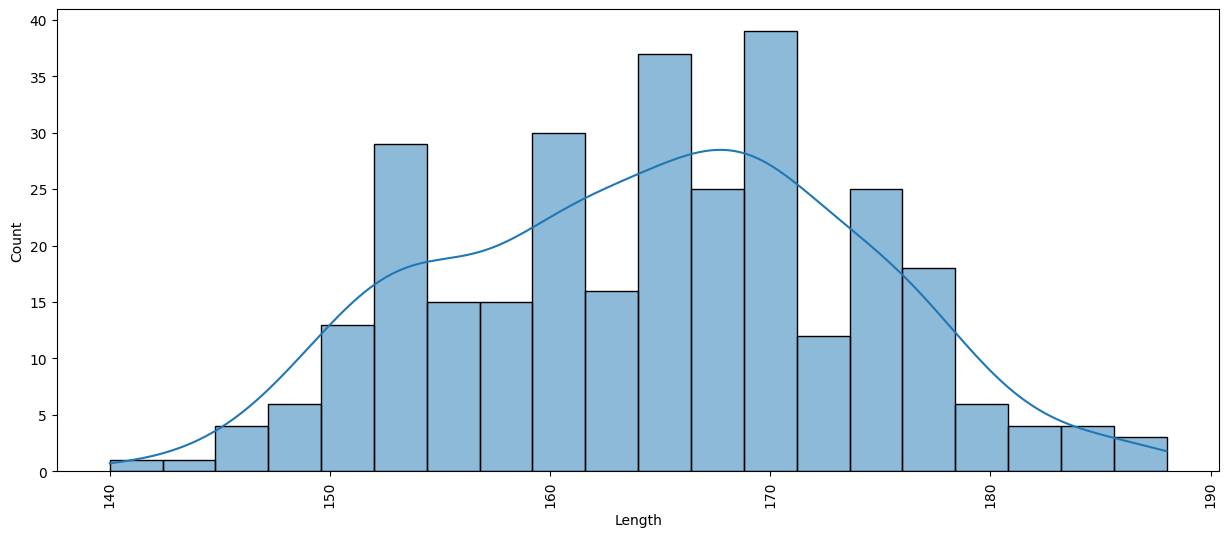

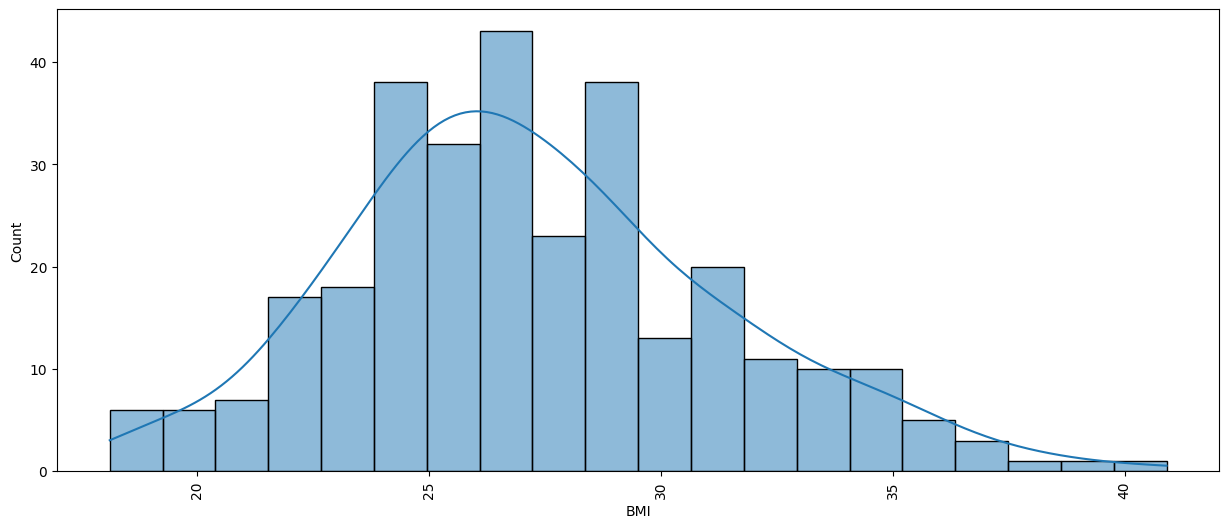

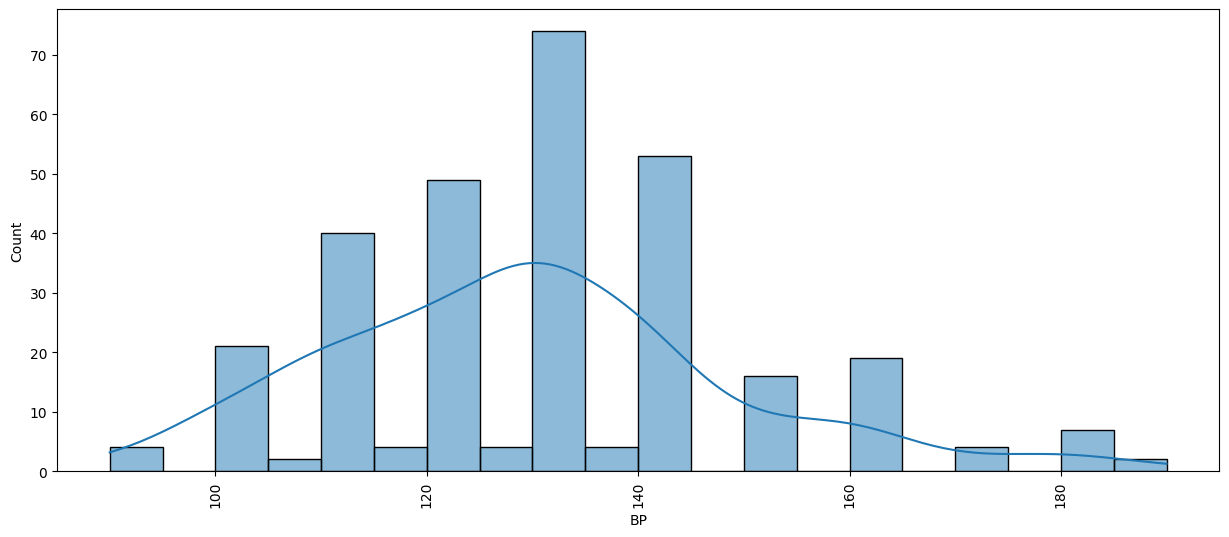

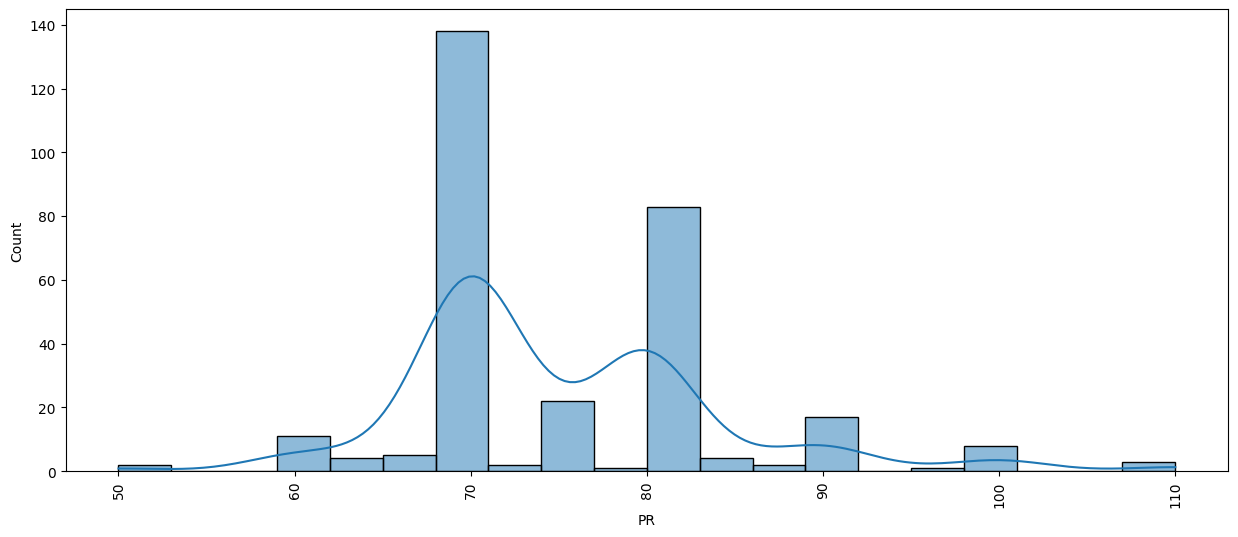

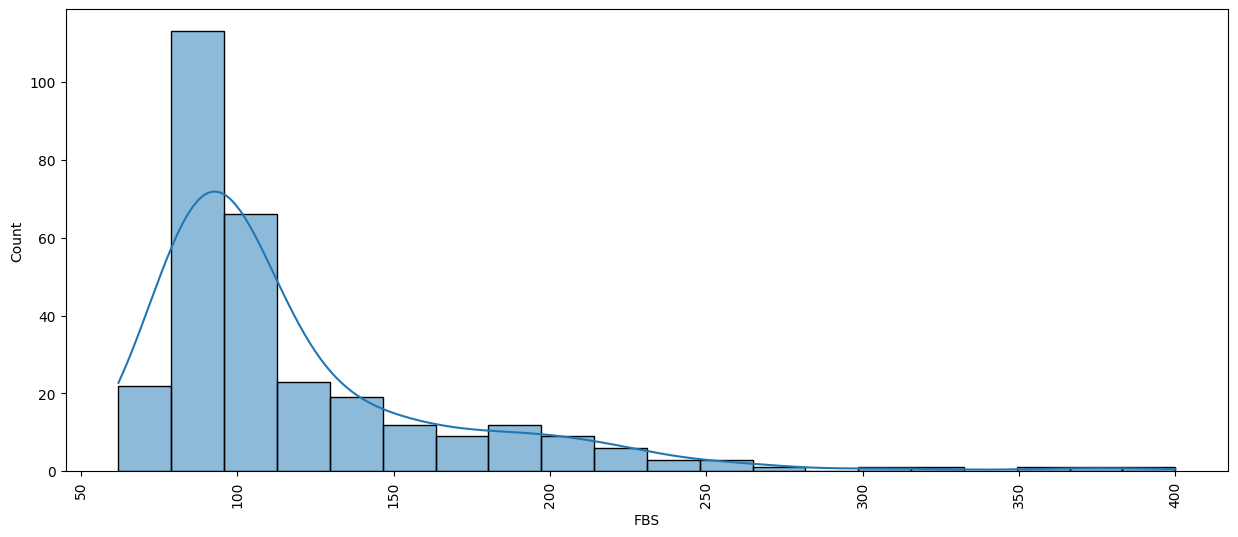

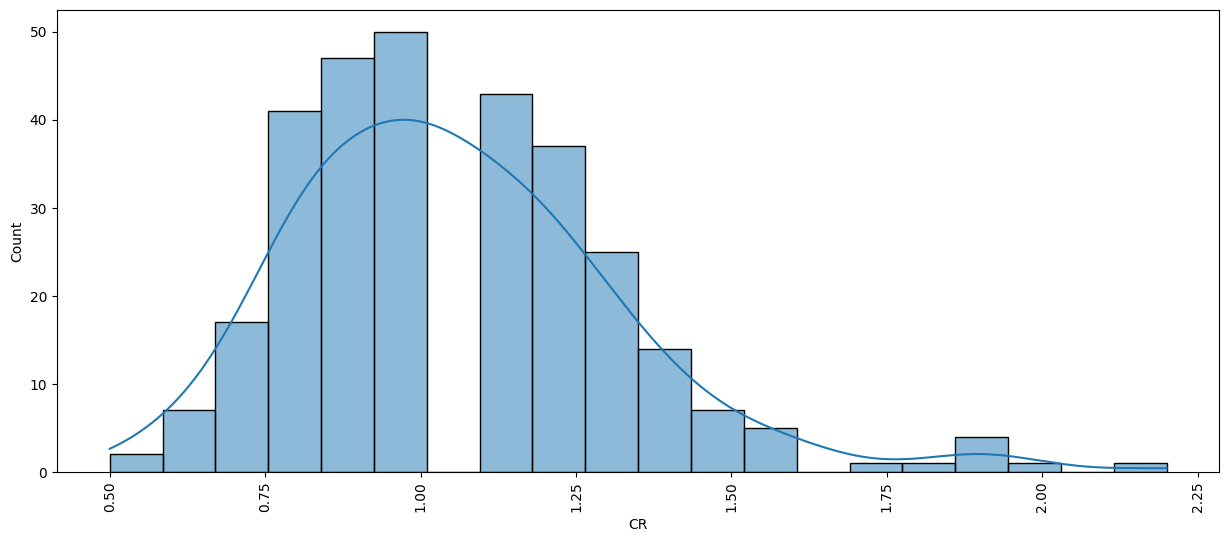

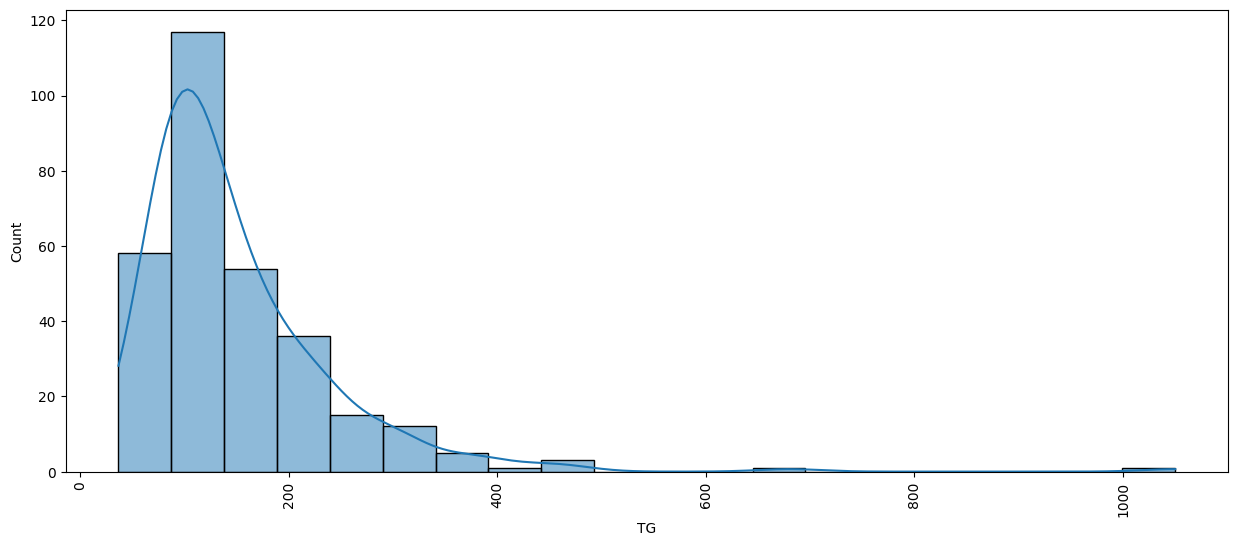

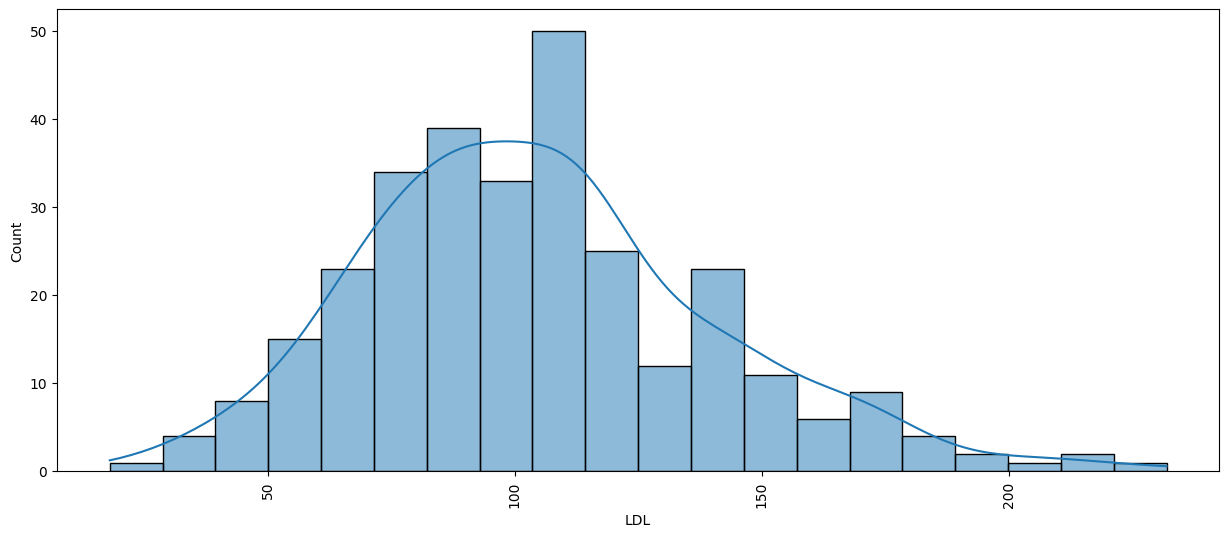

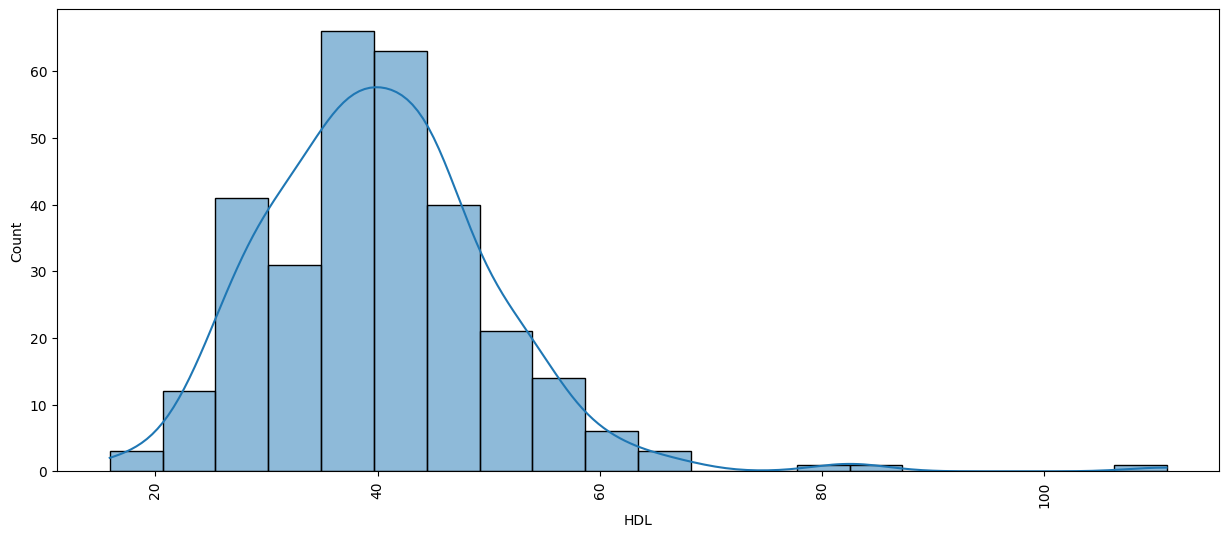

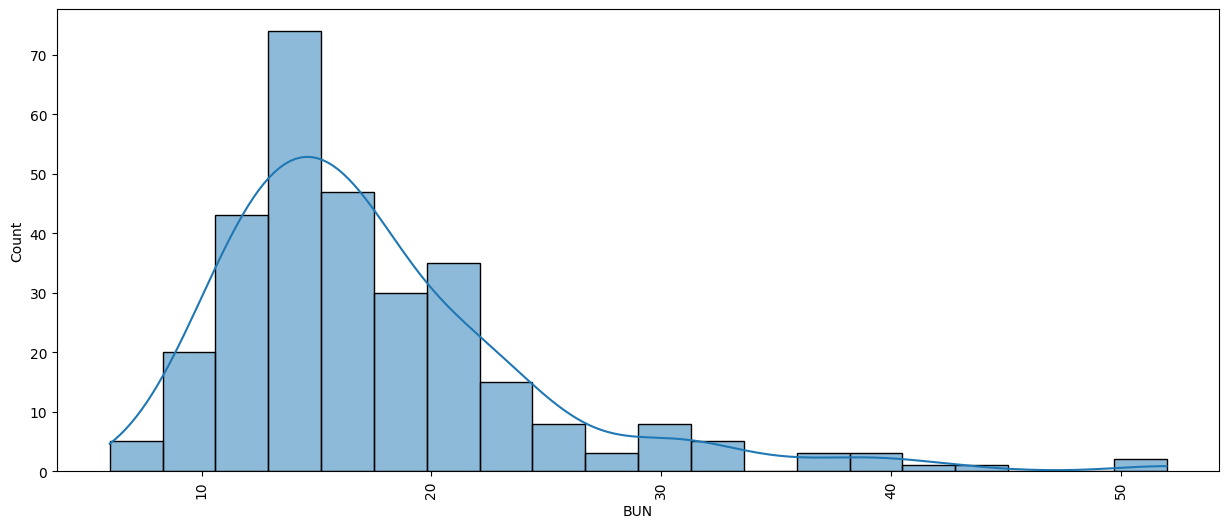

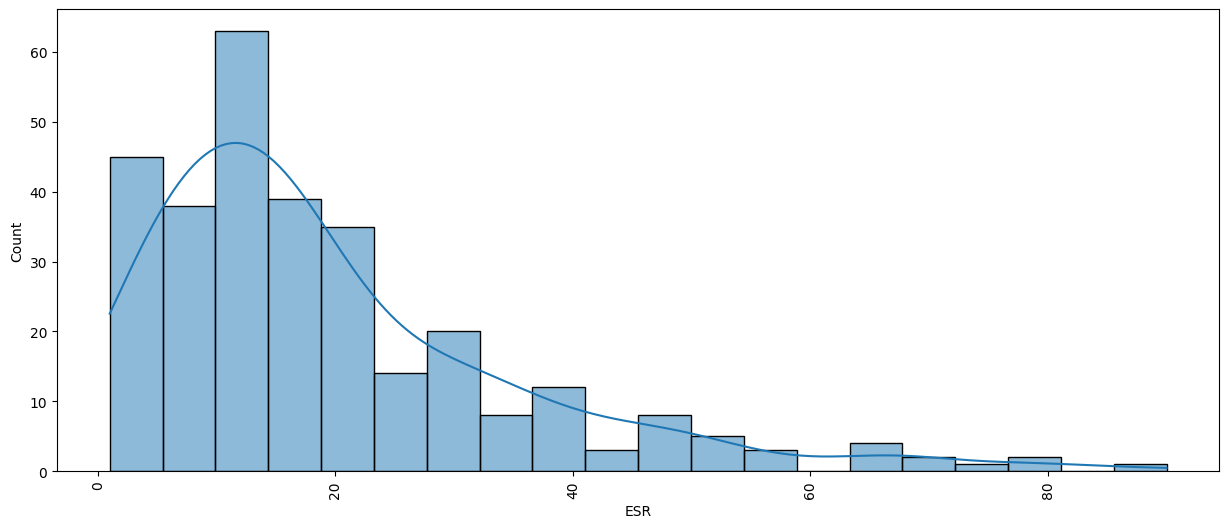

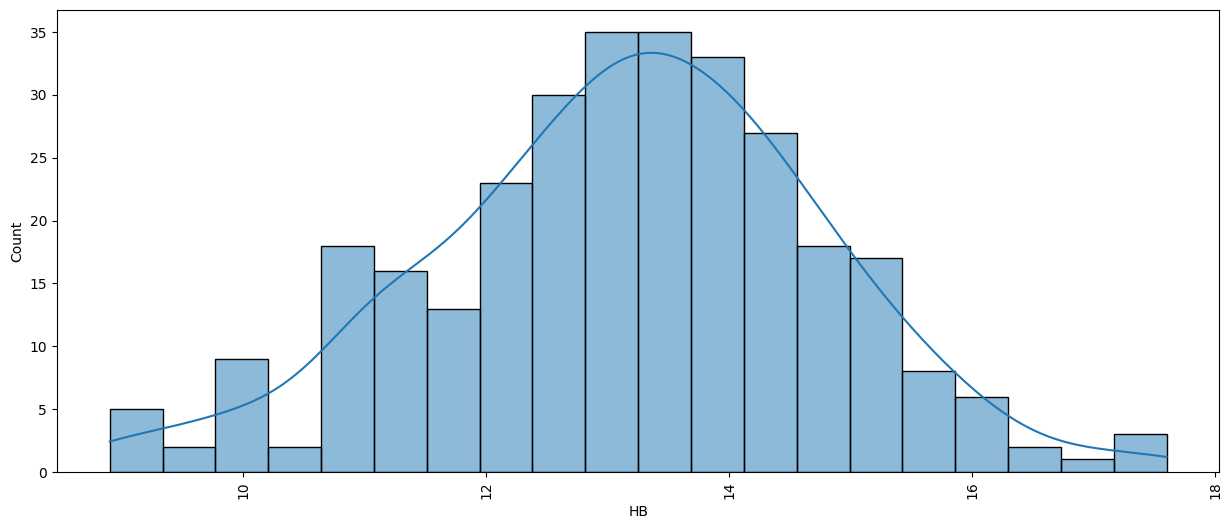

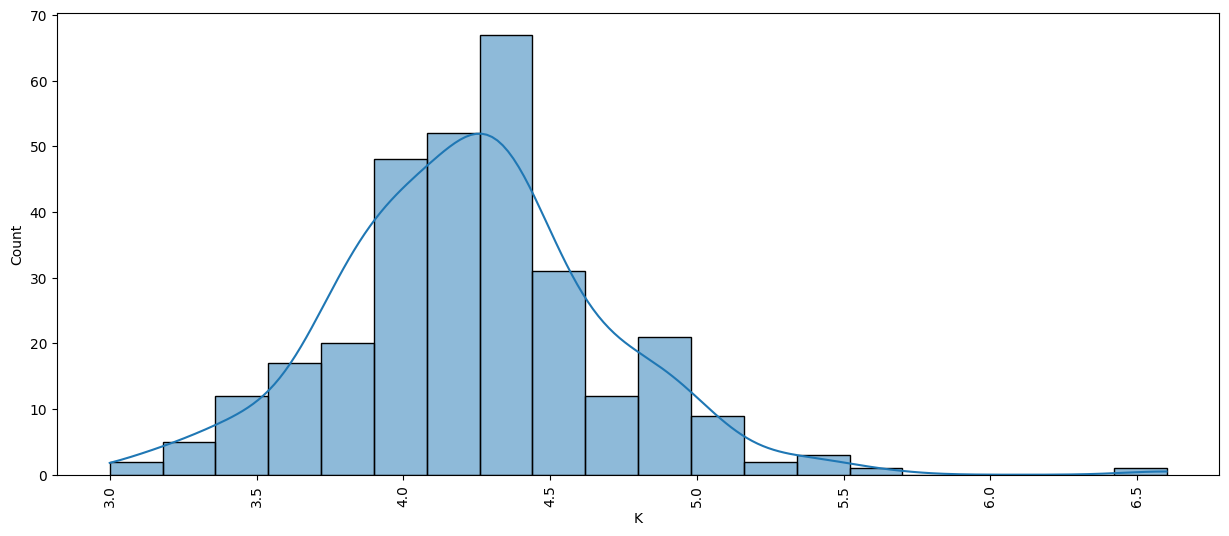

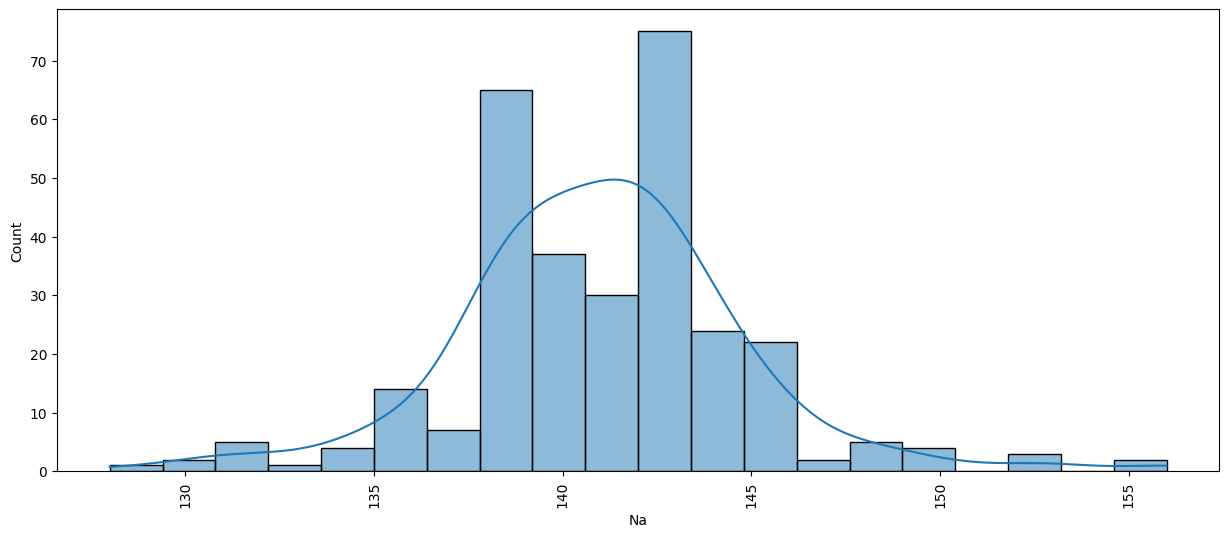

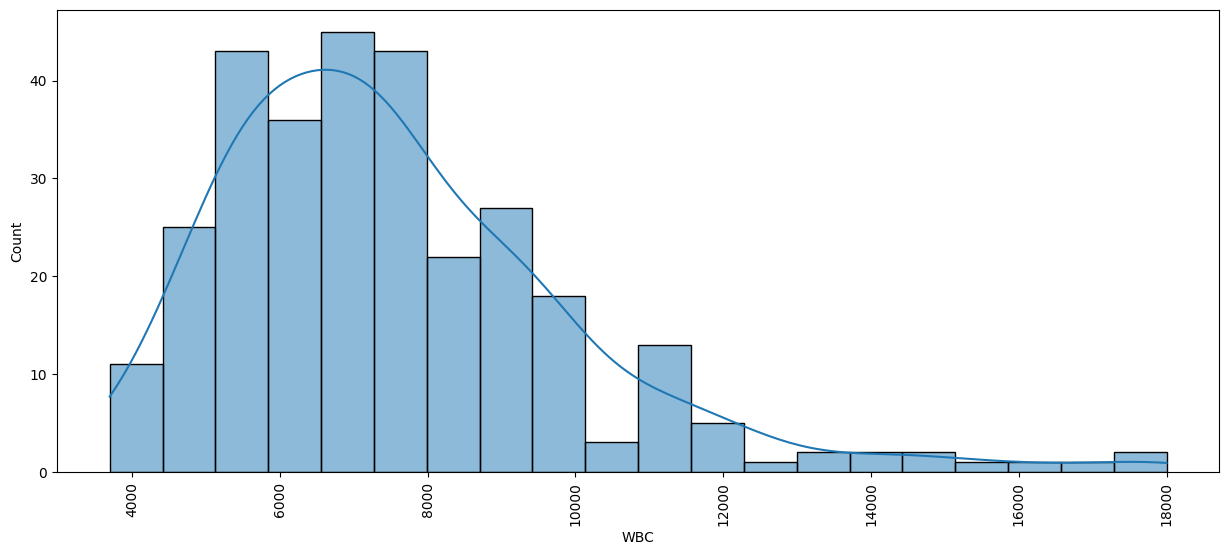

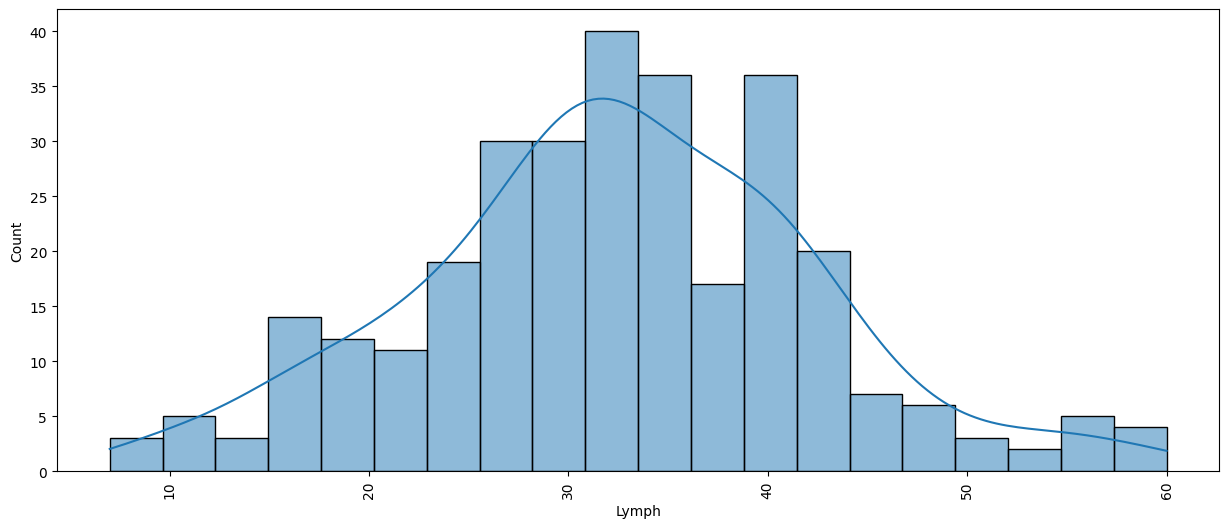

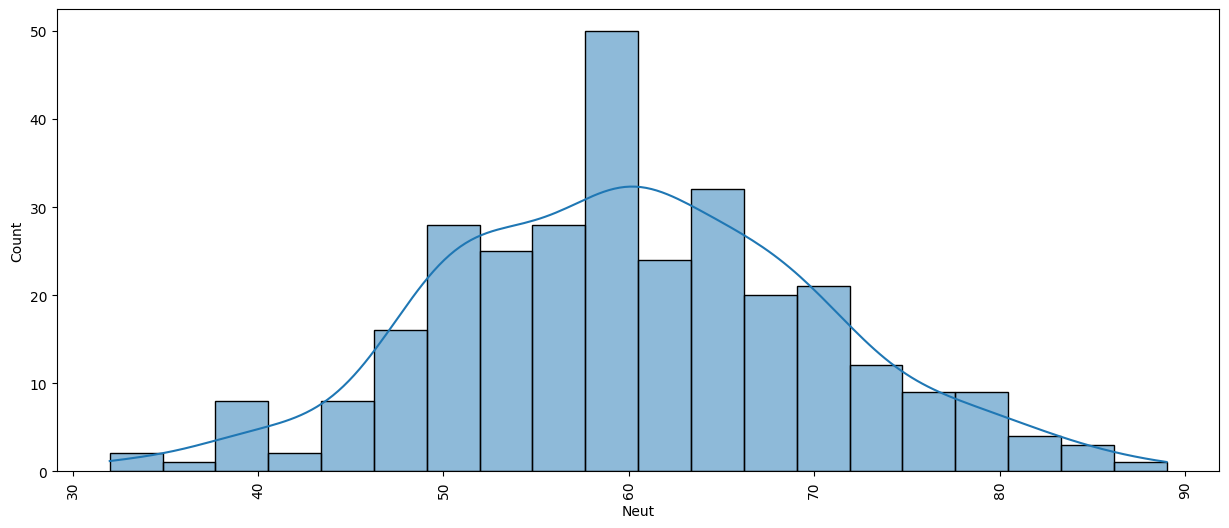

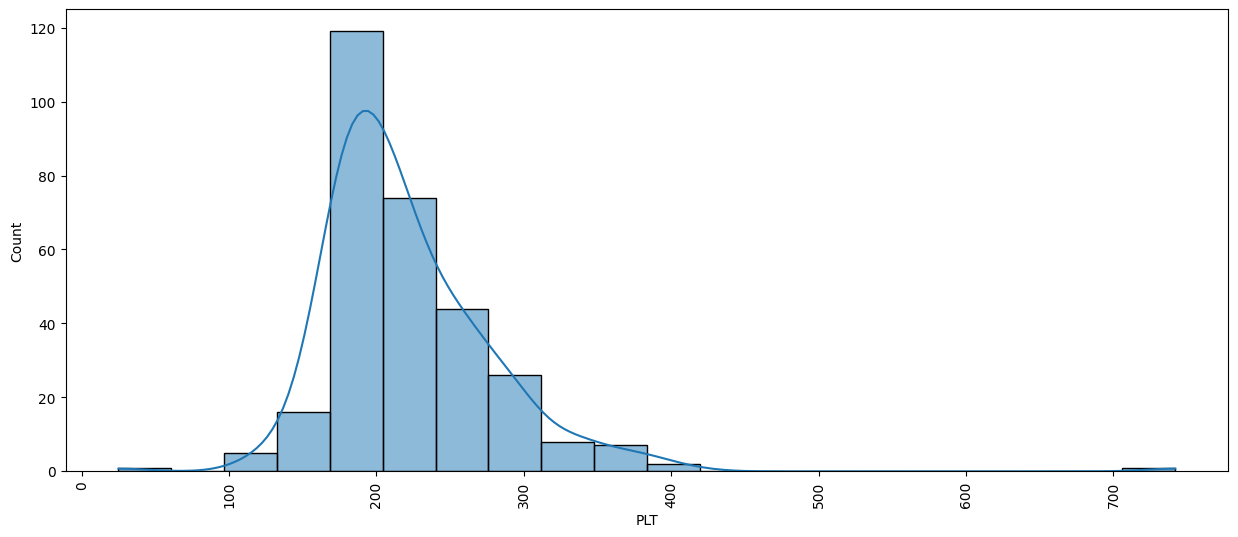

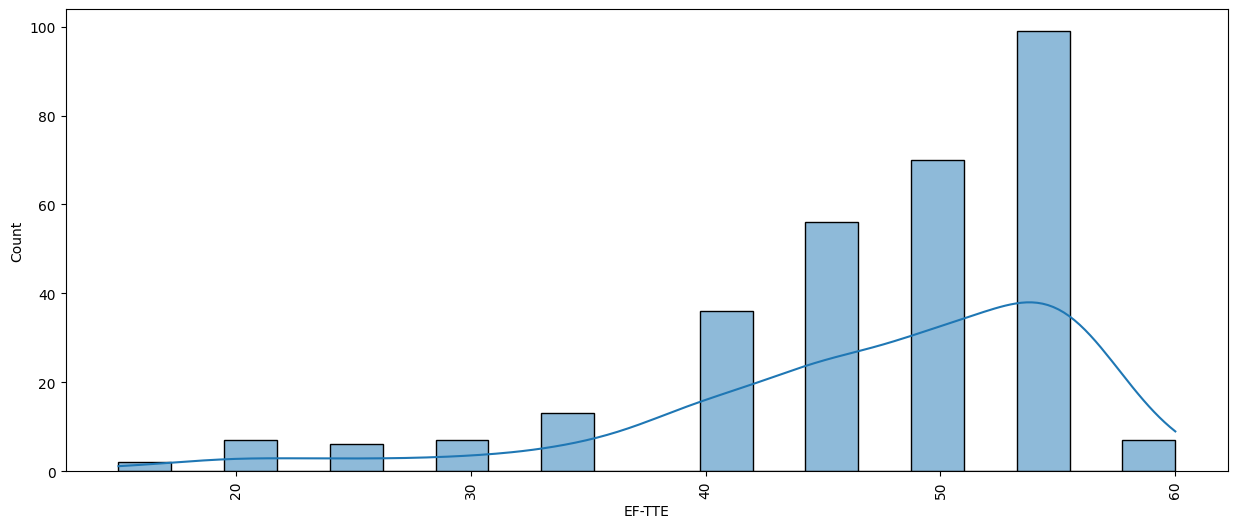

In [16]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

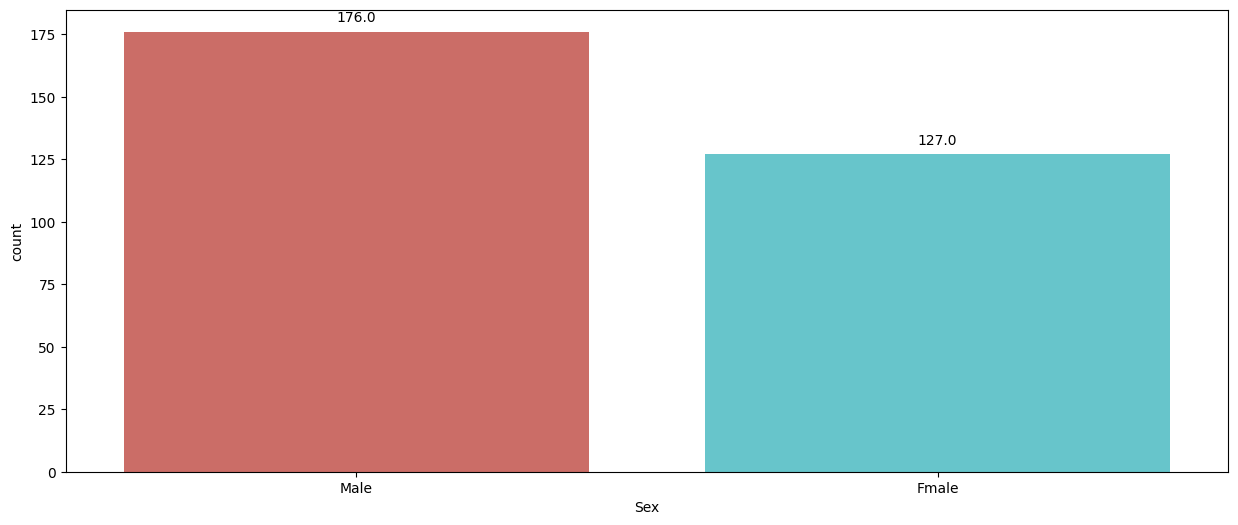

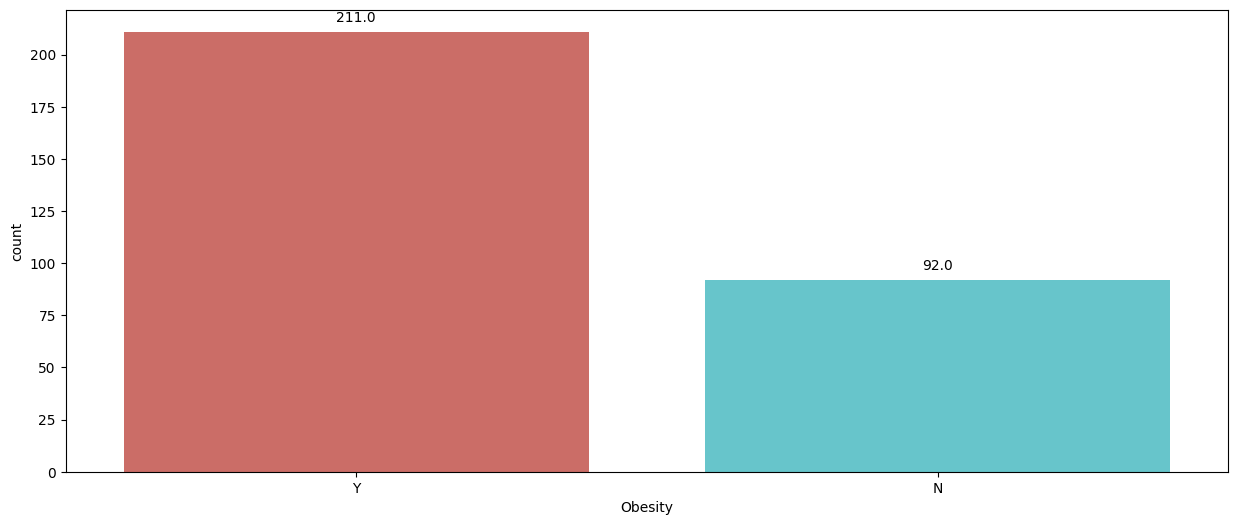

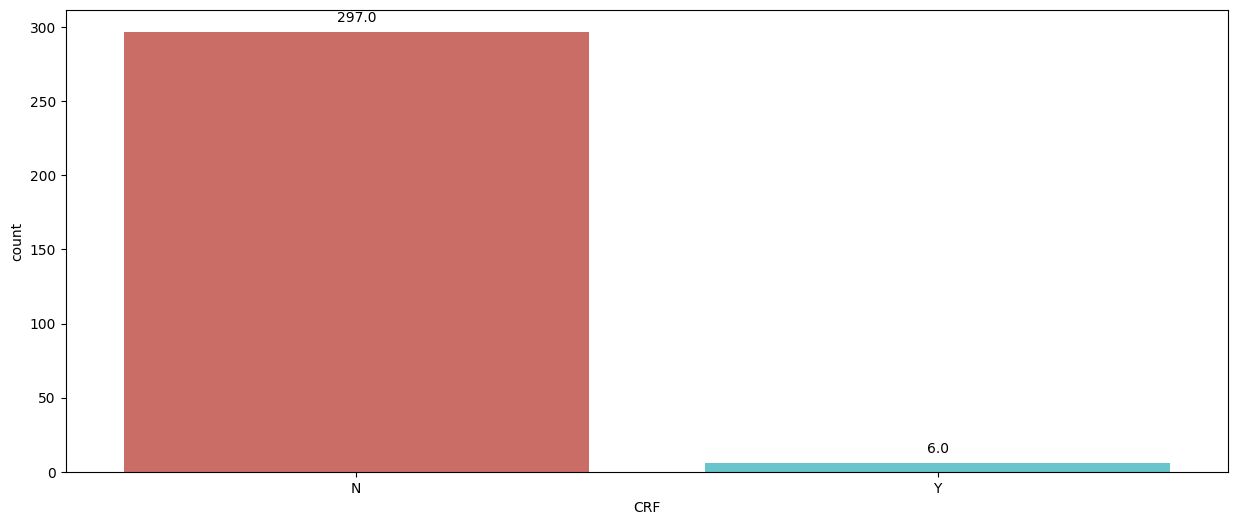

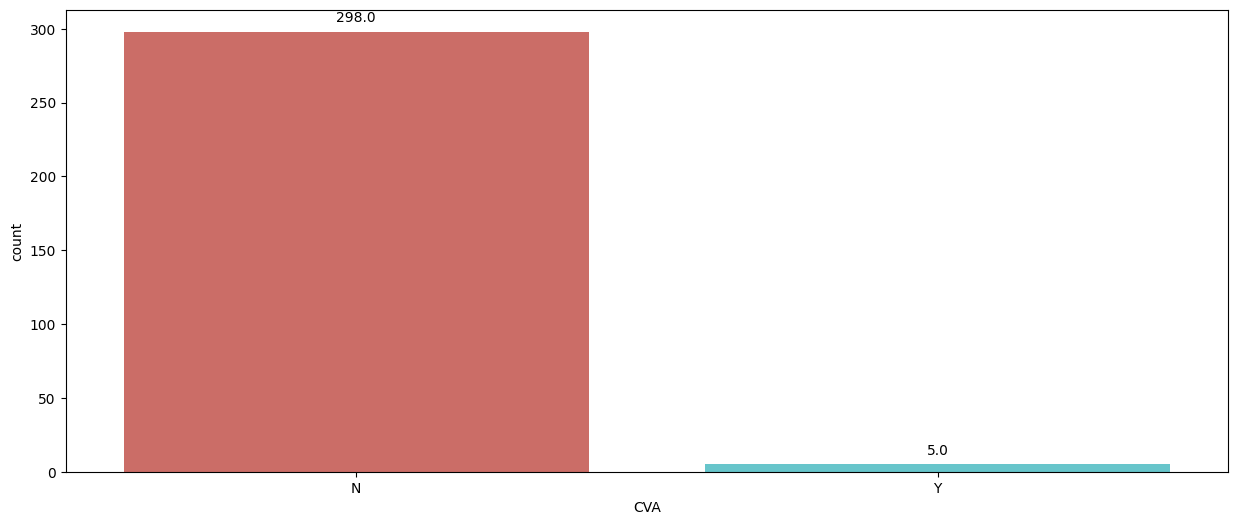

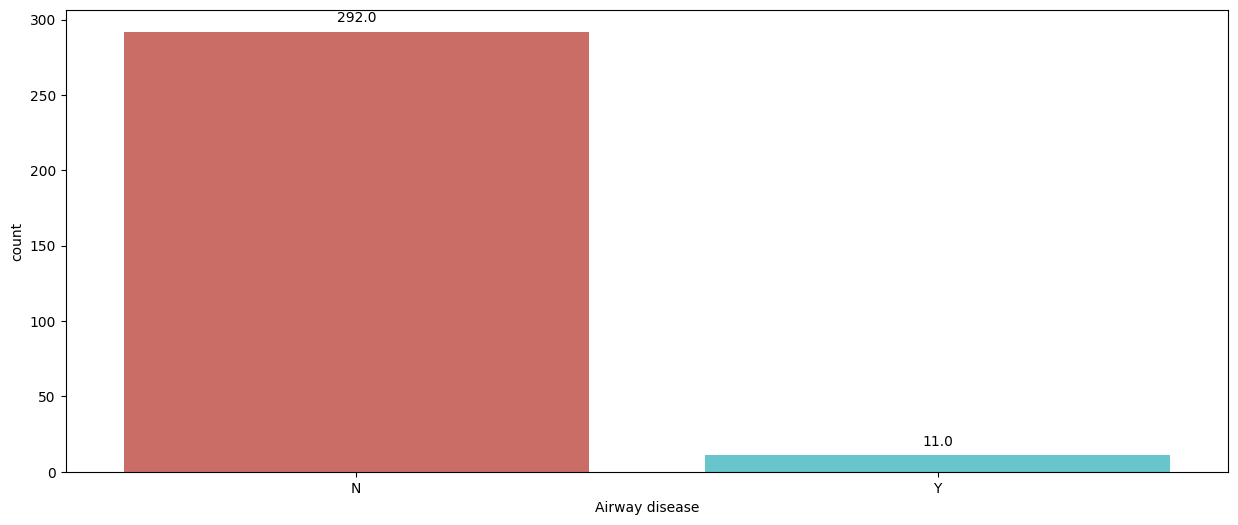

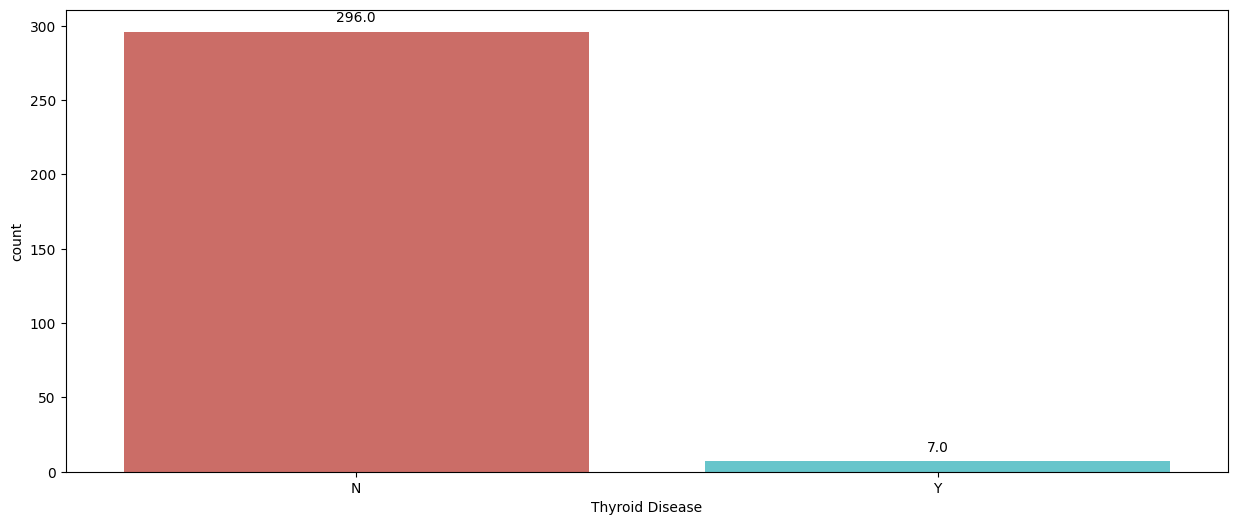

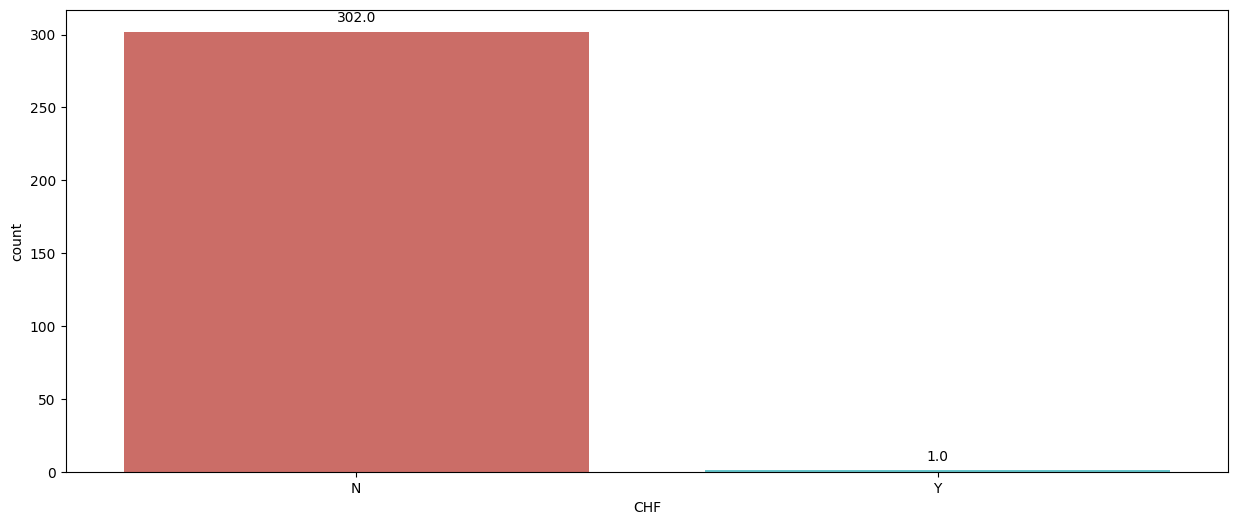

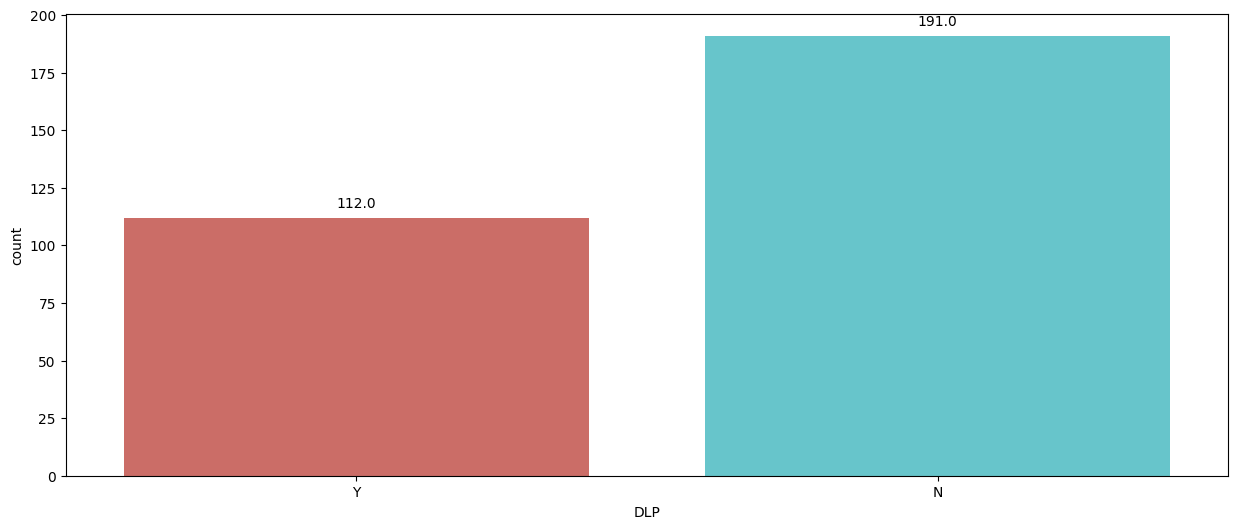

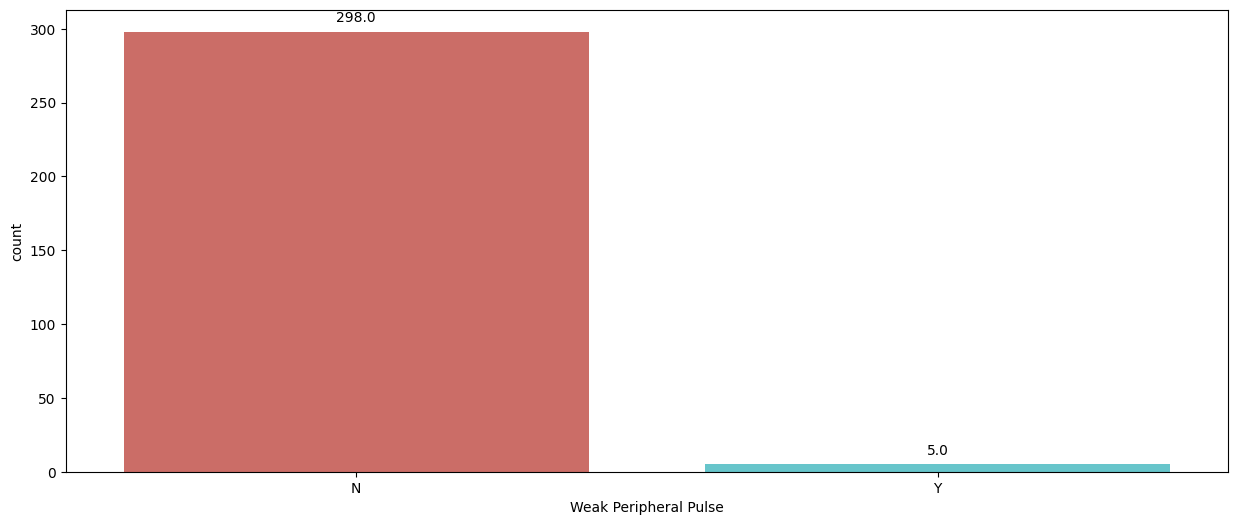

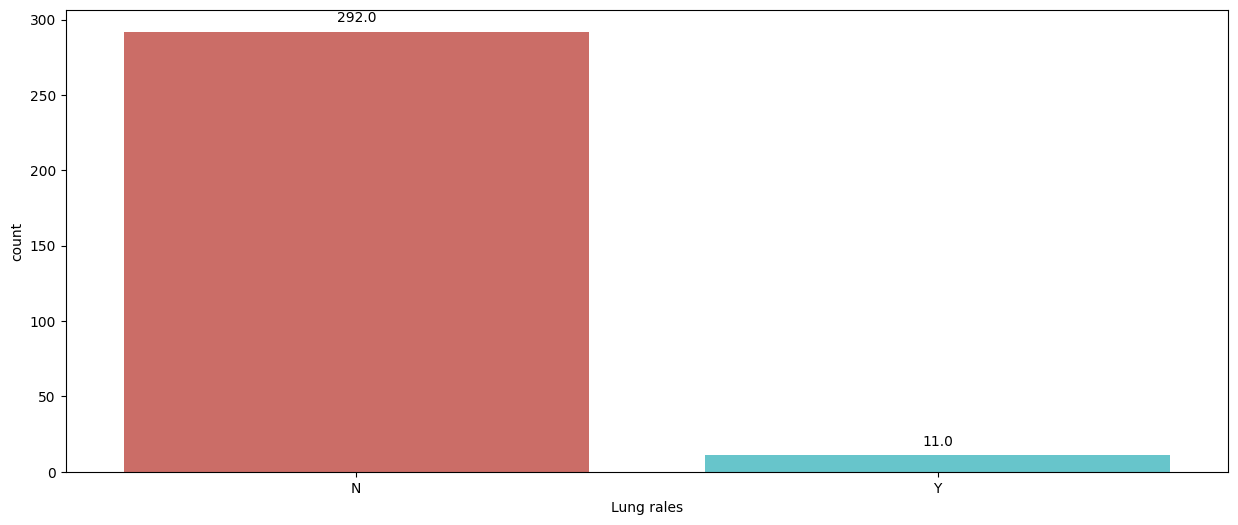

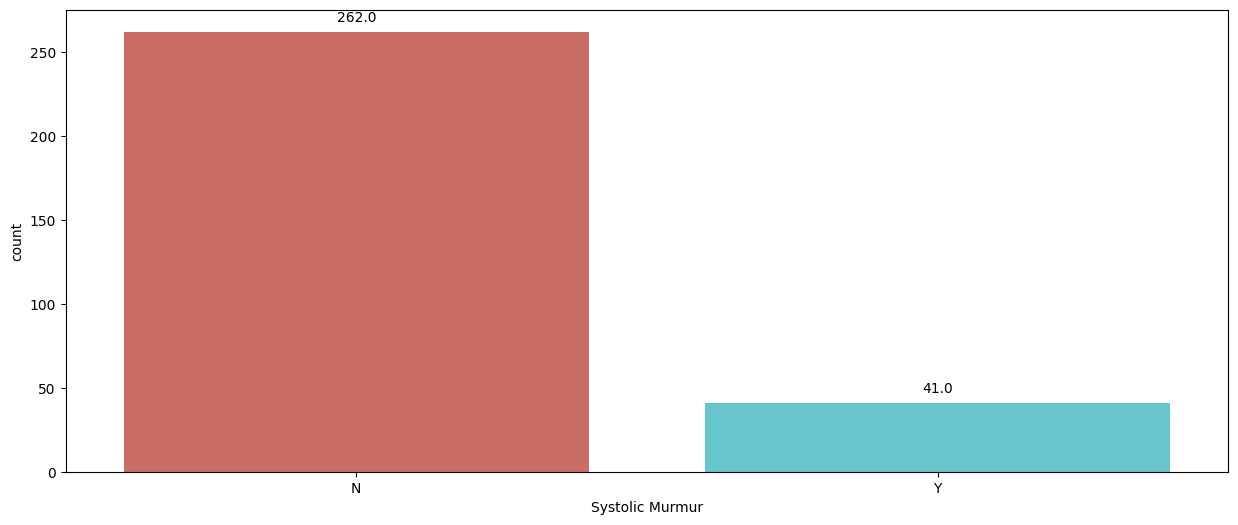

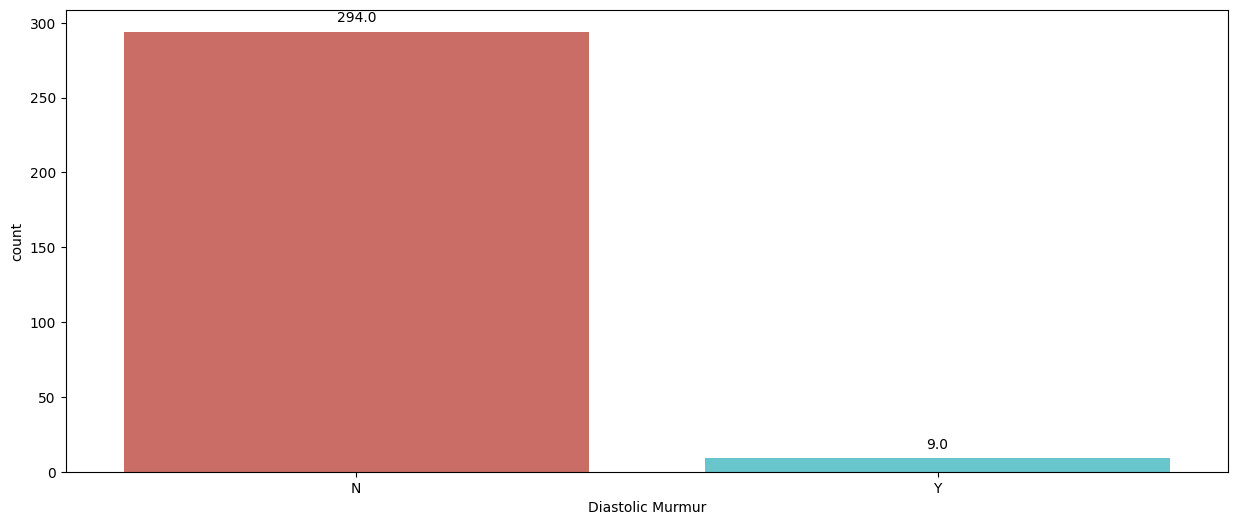

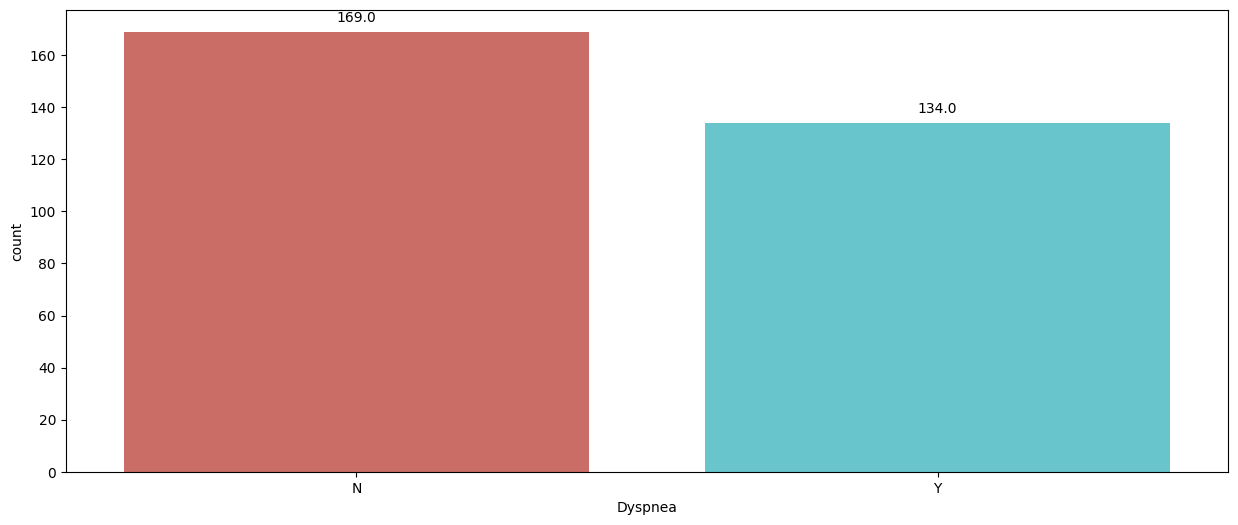

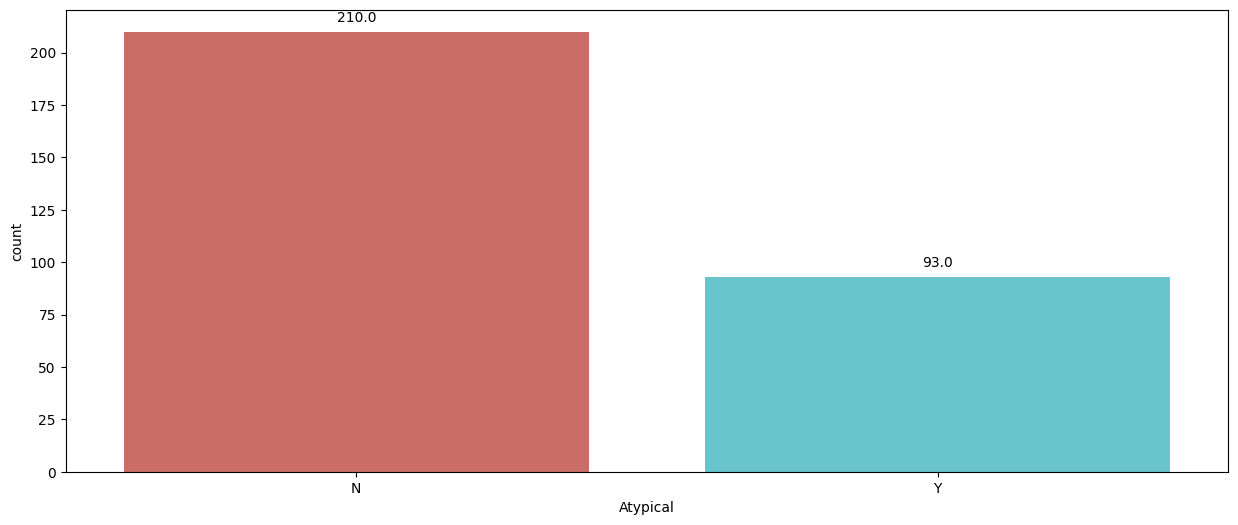

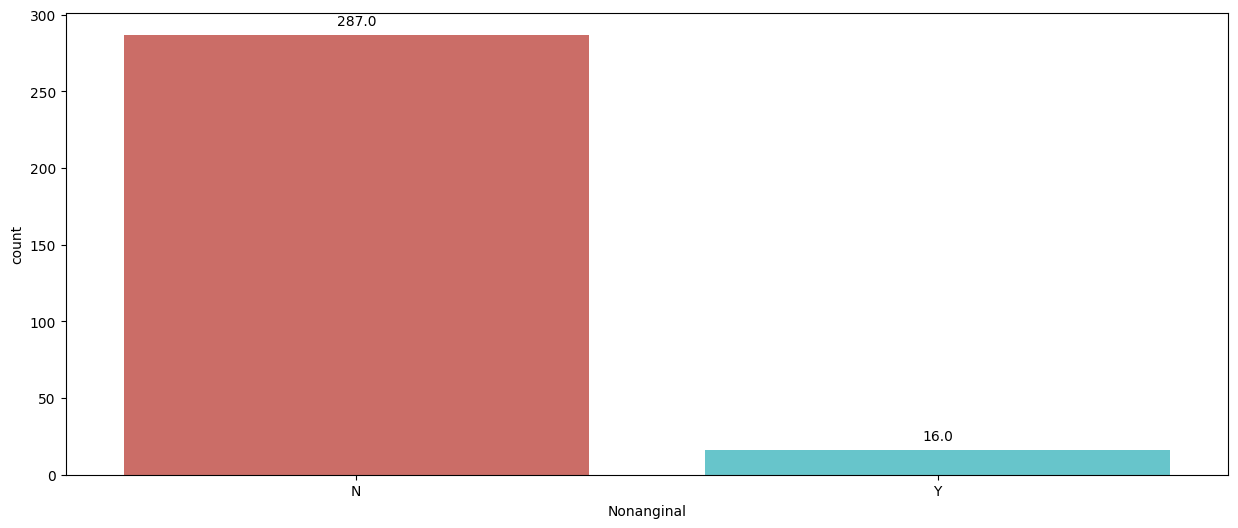

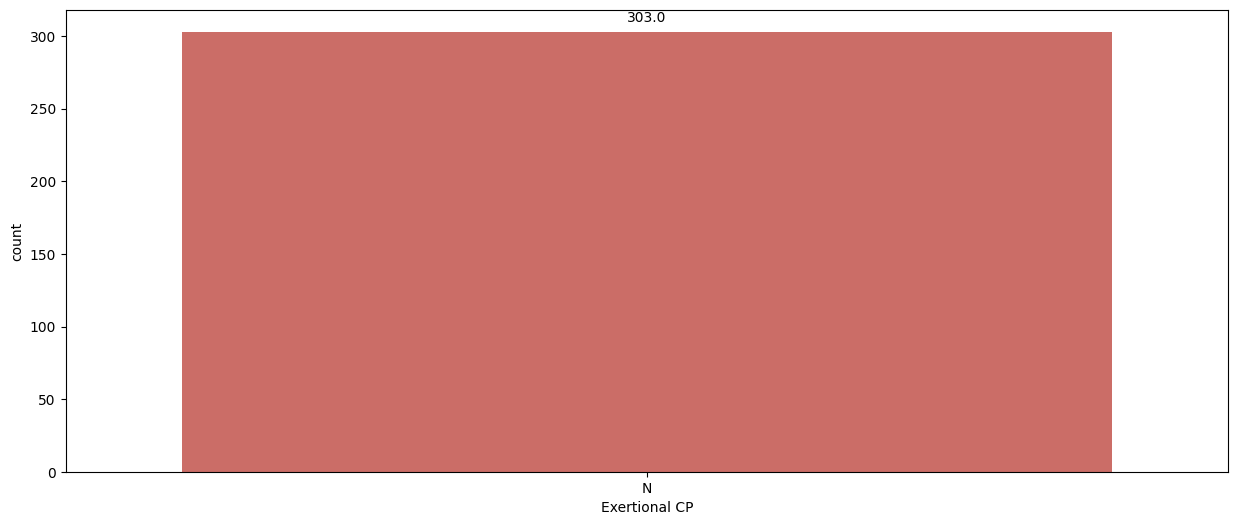

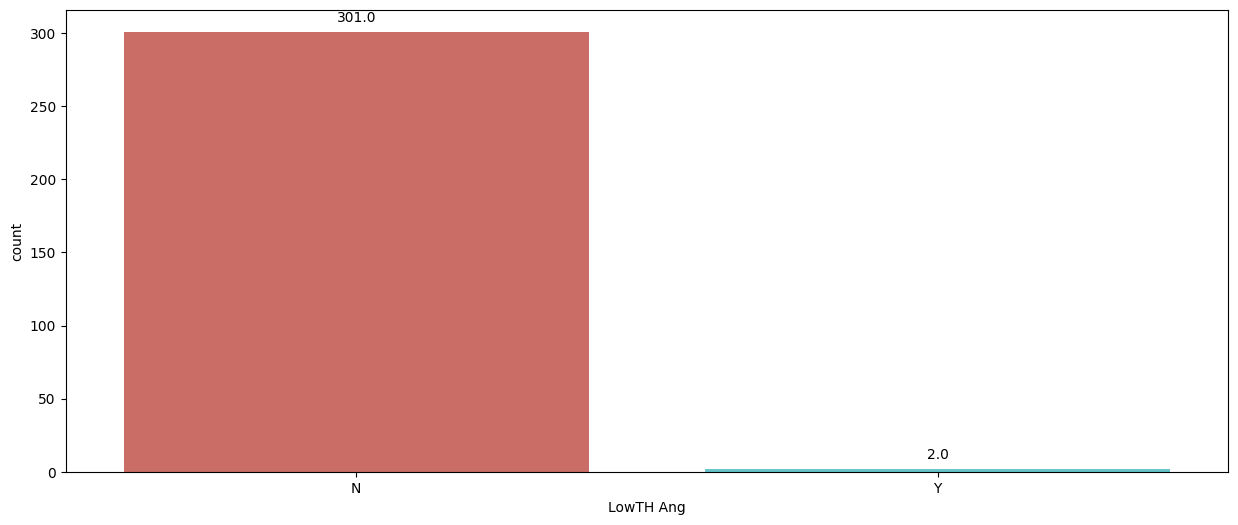

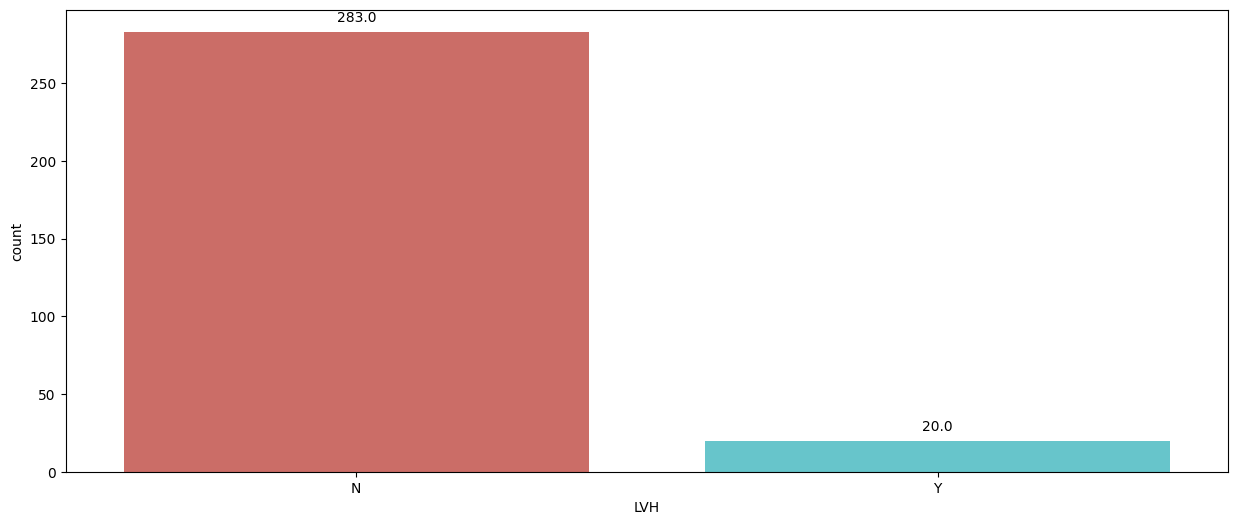

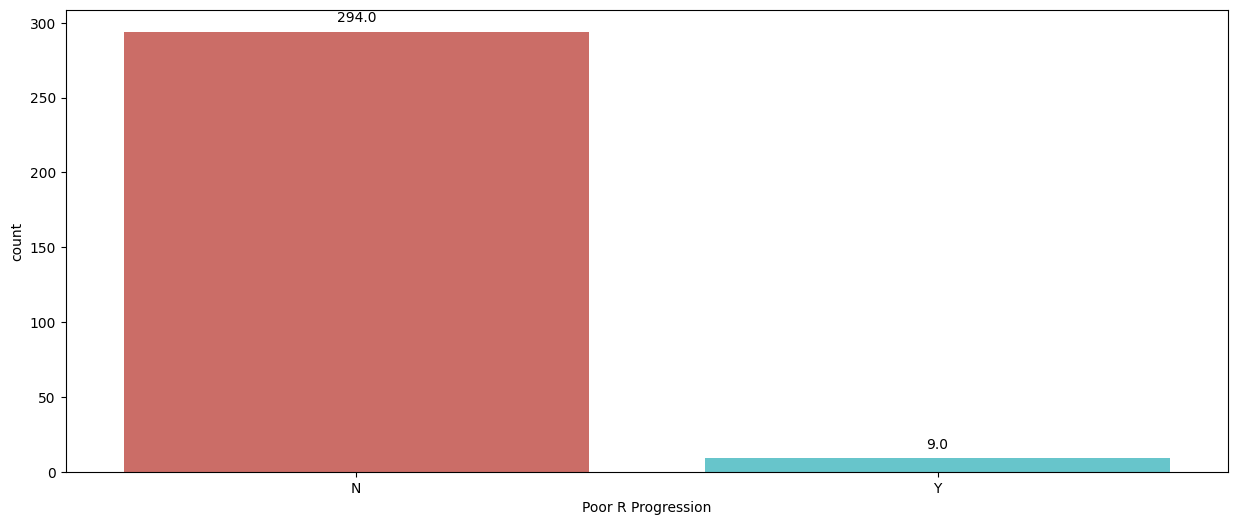

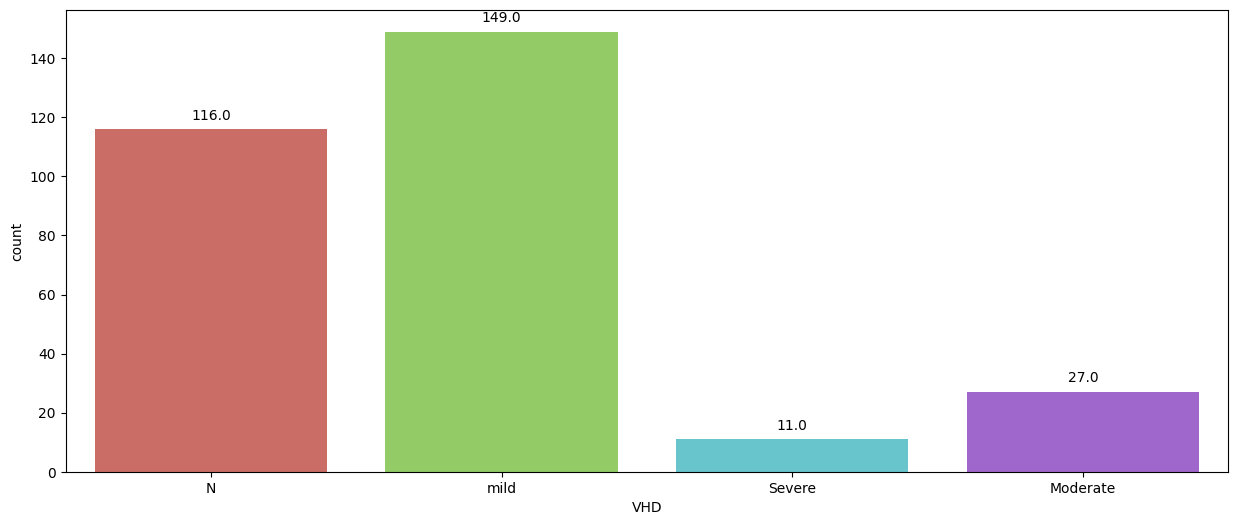

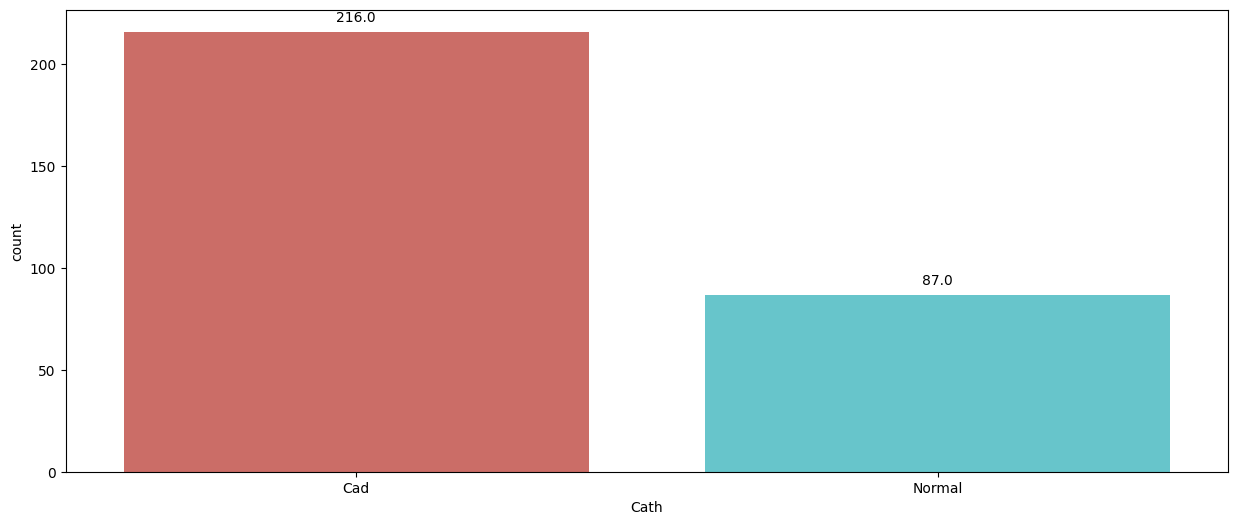

In [17]:
for i in categorical:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),  
                    textcoords='offset points',  
                    ha='center', va='center')  
    
    plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    object 
 11  CRF                    303 non-null    object 
 12  CVA                    303 non-null    object 
 13  Airway disease         303 non-null    object 
 14  Thyroid Disease        303 non-null    object 
 15  CHF   

In [ ]:
categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

In [23]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object

encoder = LabelEncoder()

df_encoded = df.copy()

# Iterate over each column in the DataFrame

for col in df_encoded.select_dtypes(include=['object']).columns:
    encoder.fit(df_encoded[col])
    df_encoded[col] = encoder.transform(df_encoded[col])

In [25]:
df_encoded.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,1,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,1,0
1,67,70,157,0,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,1,0
2,54,54,164,1,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,3,0
3,66,67,158,0,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,2,1
4,50,87,153,0,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,2,1


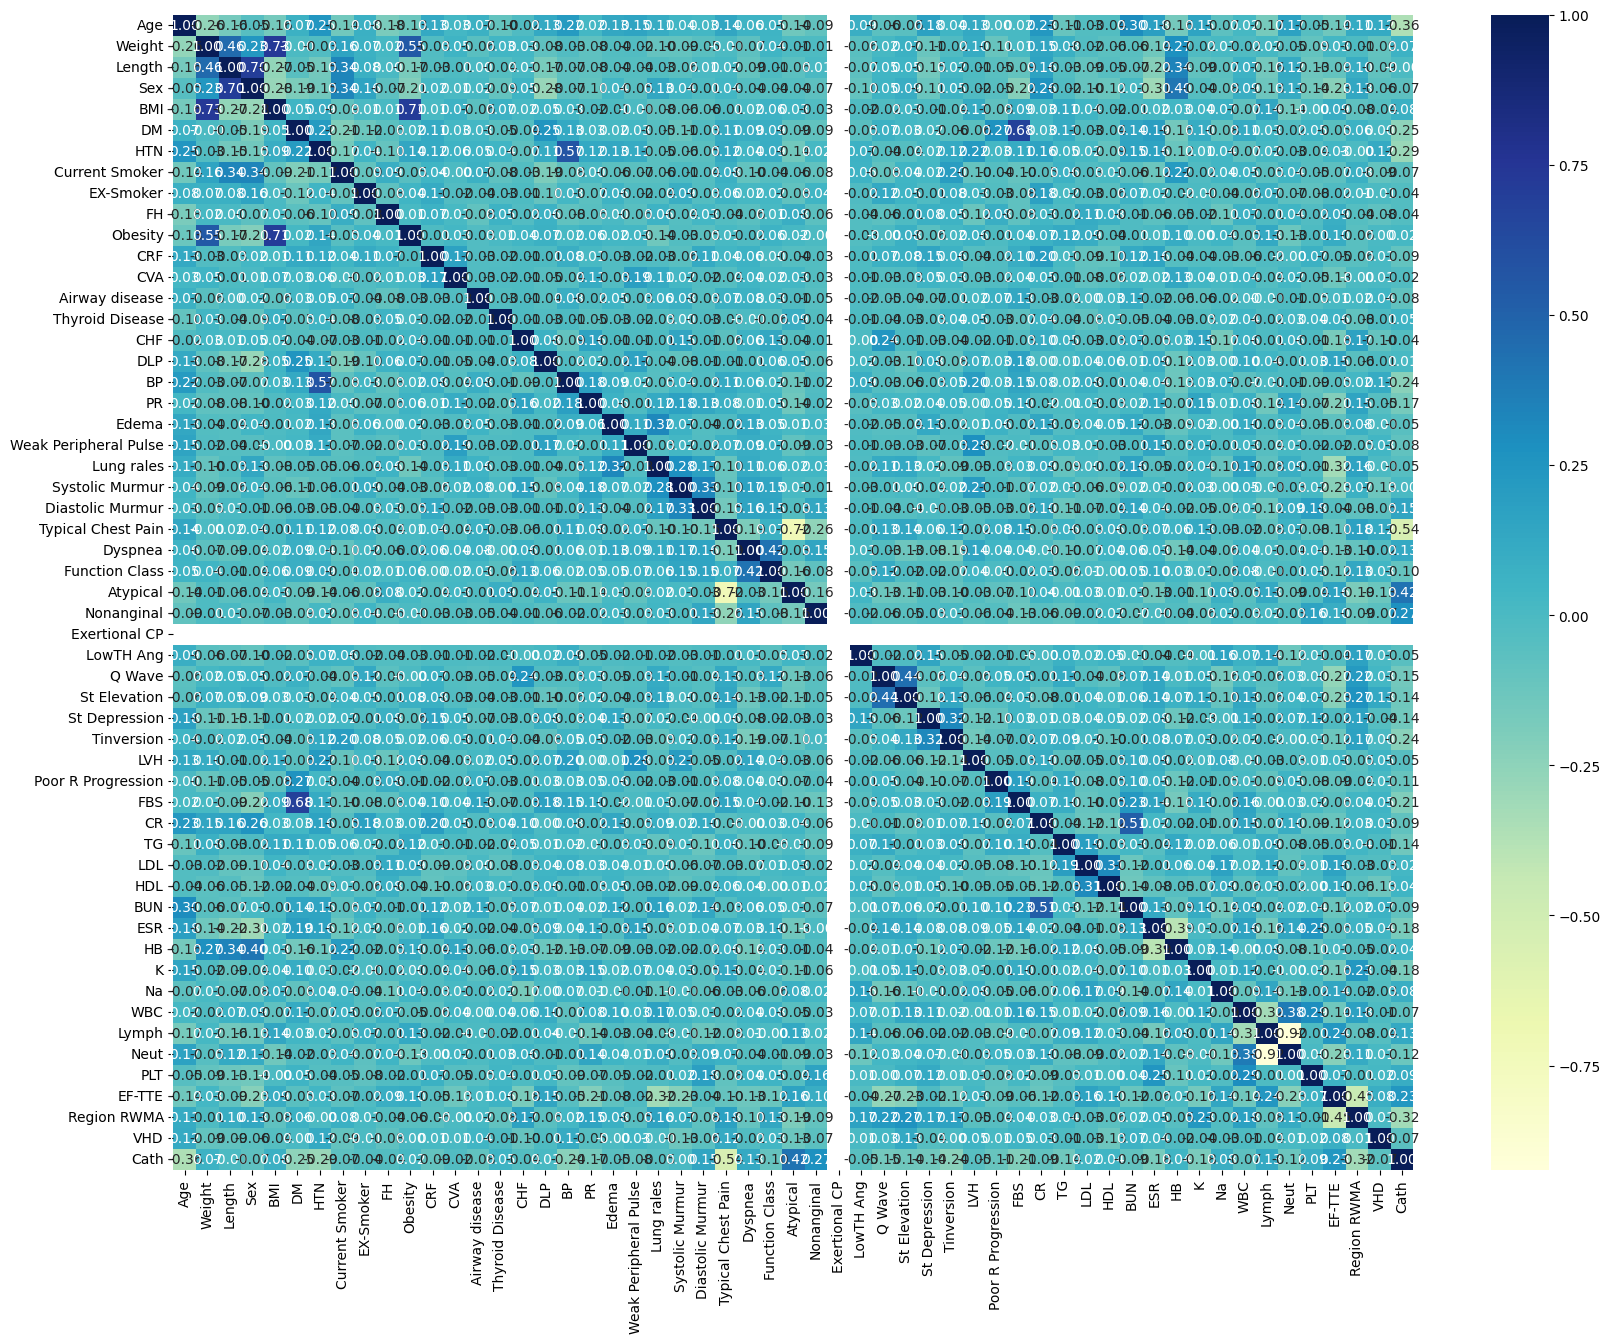

In [27]:
corr = df_encoded.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.show()

In [41]:
correlation = df_encoded.corr()
target_corr = correlation['Cath'].abs().sort_values(ascending=False)

# Select features with correlation above a threshold
selected_features = target_corr[target_corr > 0.15].index.tolist()
print("Selected Features:", selected_features)

Selected Features: ['Cath', 'Typical Chest Pain', 'Atypical', 'Age', 'Region RWMA', 'HTN', 'Nonanginal', 'DM', 'BP', 'Tinversion', 'EF-TTE', 'FBS', 'K', 'ESR', 'PR']


In [42]:
df_new = df_encoded[selected_features]

In [43]:
df_new

,Cath,Typical Chest Pain,Atypical,Age,Region RWMA,HTN,Nonanginal,DM,BP,Tinversion,EF-TTE,FBS,K,ESR,PR
0,0,0,0,53,0,1,0,0,110,1,50,90,4.7,7,80
1,0,1,0,67,4,1,0,0,140,1,40,80,4.7,26,80
2,0,1,0,54,2,0,0,0,100,0,40,85,4.7,10,100
3,1,0,0,66,0,1,1,0,100,0,55,78,4.4,76,80
4,1,0,0,50,0,1,0,0,110,0,50,104,4.0,27,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,1,0,58,0,0,0,0,100,0,45,92,4.8,13,76
299,1,0,1,55,0,0,0,0,100,0,40,86,4.0,3,60
300,1,0,0,48,0,1,1,0,130,0,55,83,4.0,20,70
301,1,0,1,57,0,0,0,1,100,0,55,96,3.8,31,60


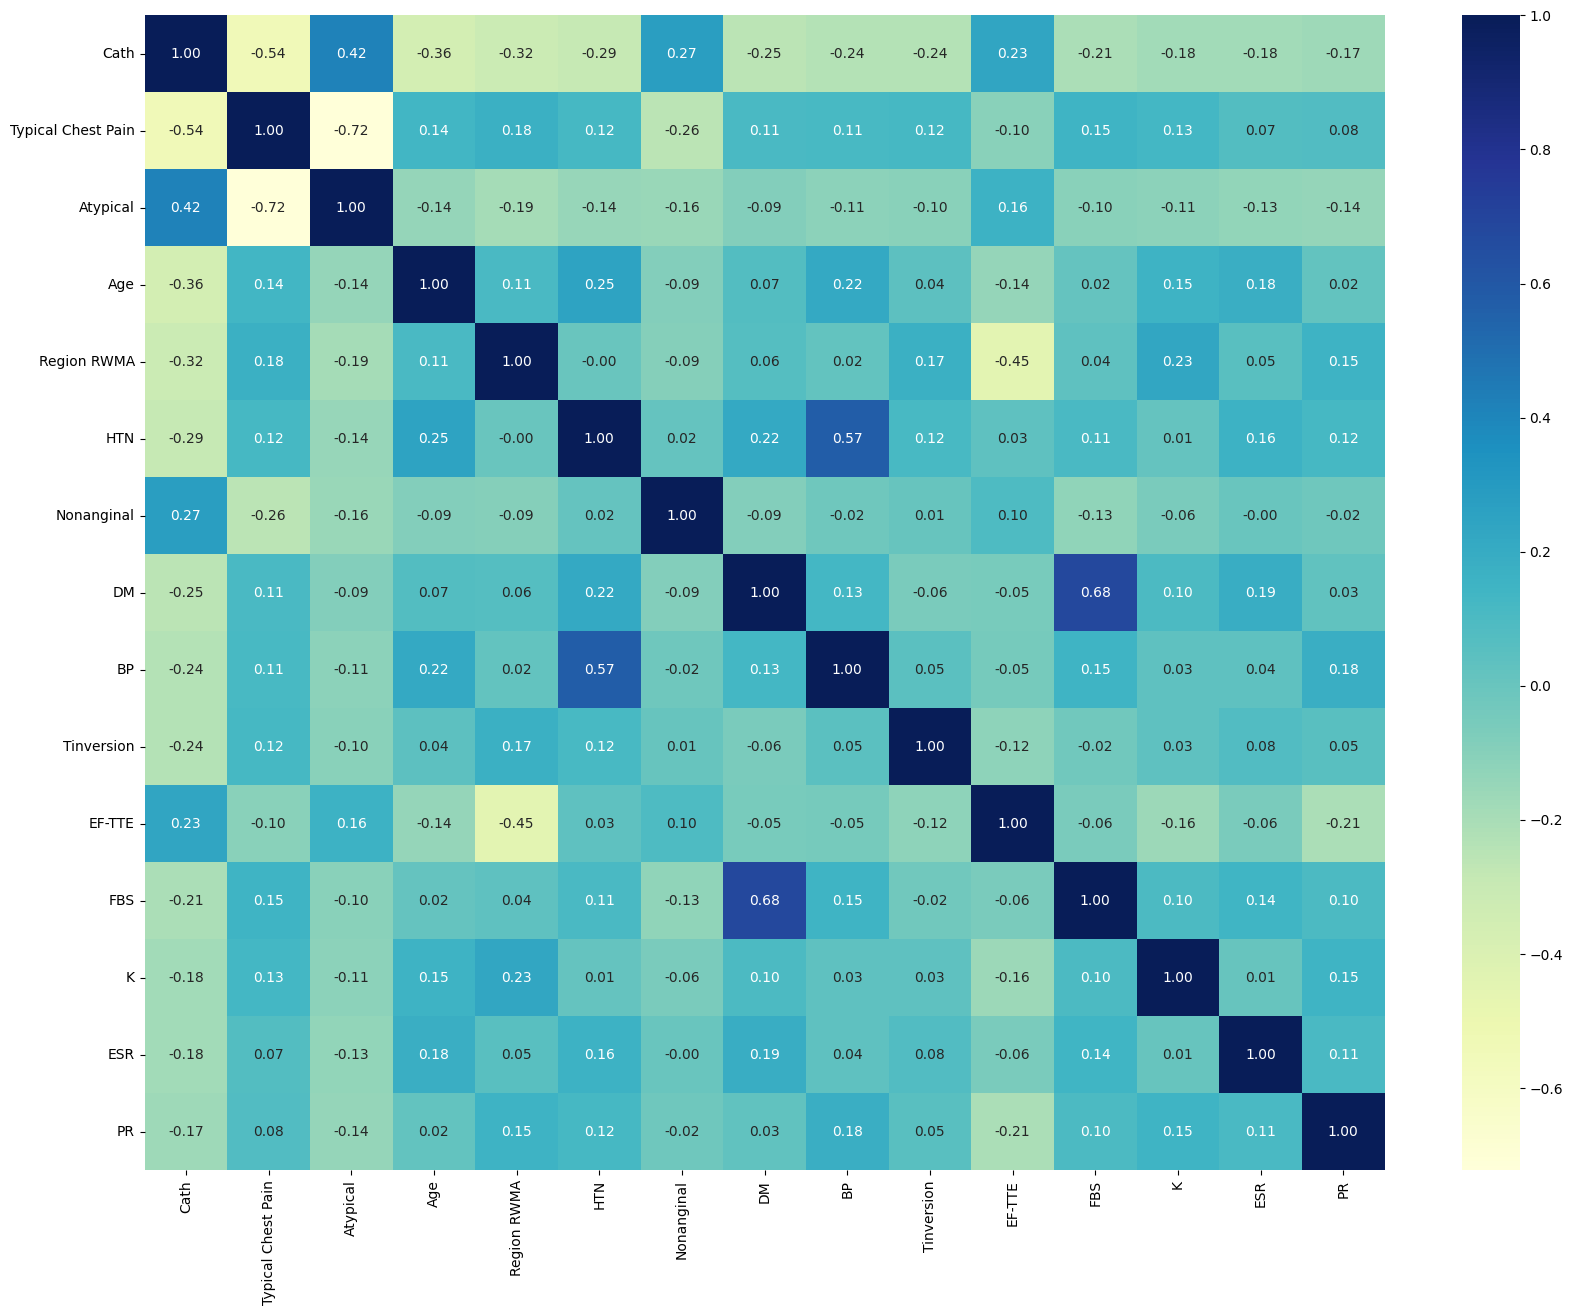

In [44]:
corr = df_new.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.show()

### Modeling

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [48]:
X = df_new.drop(columns=['Cath'])
y = df_new['Cath']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}


Training Logistic Regression...

Logistic Regression:
Accuracy: 0.8524590163934426
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        43
           1       0.85      0.61      0.71        18

    accuracy                           0.85        61
   macro avg       0.85      0.78      0.81        61
weighted avg       0.85      0.85      0.84        61

Confusion Matrix:
[[41  2]
 [ 7 11]]


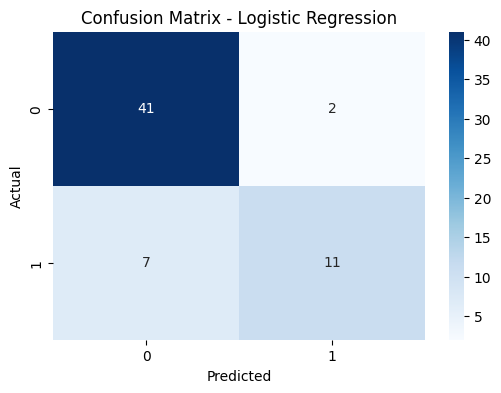


Training Random Forest...

Random Forest:
Accuracy: 0.8524590163934426
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        43
           1       0.85      0.61      0.71        18

    accuracy                           0.85        61
   macro avg       0.85      0.78      0.81        61
weighted avg       0.85      0.85      0.84        61

Confusion Matrix:
[[41  2]
 [ 7 11]]


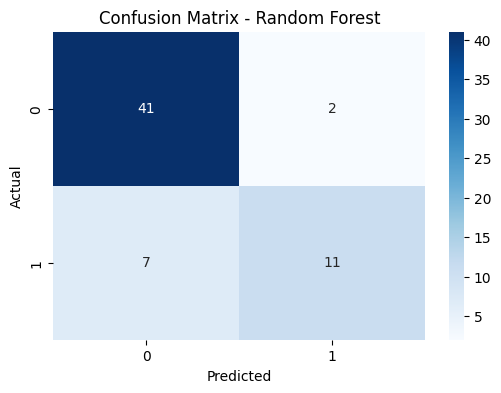


Training Support Vector Machine...

Support Vector Machine:
Accuracy: 0.7049180327868853
Classification Report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.83        43
           1       0.00      0.00      0.00        18

    accuracy                           0.70        61
   macro avg       0.35      0.50      0.41        61
weighted avg       0.50      0.70      0.58        61

Confusion Matrix:
[[43  0]
 [18  0]]


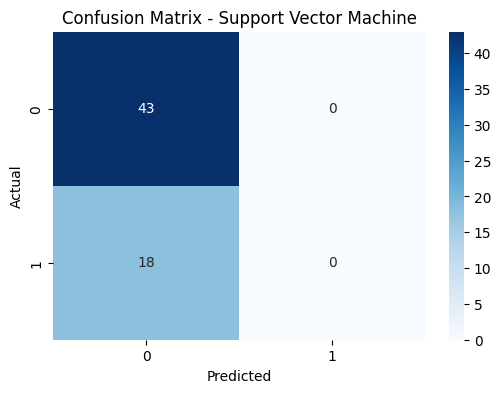


Training K-Nearest Neighbors...

K-Nearest Neighbors:
Accuracy: 0.7213114754098361
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        43
           1       0.53      0.44      0.48        18

    accuracy                           0.72        61
   macro avg       0.66      0.64      0.65        61
weighted avg       0.71      0.72      0.71        61

Confusion Matrix:
[[36  7]
 [10  8]]


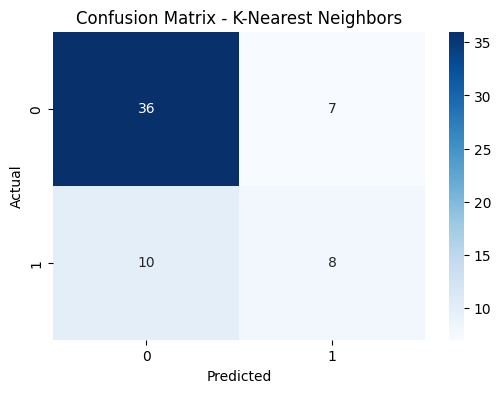


Training Gradient Boosting...

Gradient Boosting:
Accuracy: 0.8524590163934426
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        43
           1       0.85      0.61      0.71        18

    accuracy                           0.85        61
   macro avg       0.85      0.78      0.81        61
weighted avg       0.85      0.85      0.84        61

Confusion Matrix:
[[41  2]
 [ 7 11]]


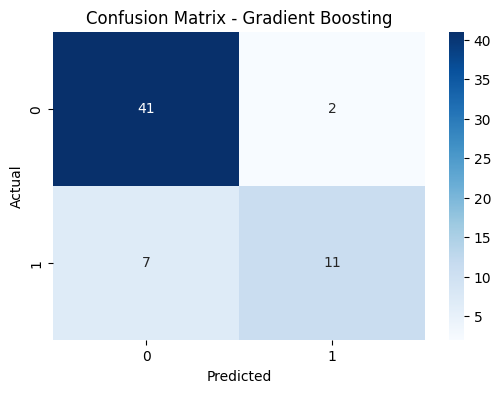


Training XGBoost...

XGBoost:
Accuracy: 0.8360655737704918
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        43
           1       0.79      0.61      0.69        18

    accuracy                           0.84        61
   macro avg       0.82      0.77      0.79        61
weighted avg       0.83      0.84      0.83        61

Confusion Matrix:
[[40  3]
 [ 7 11]]


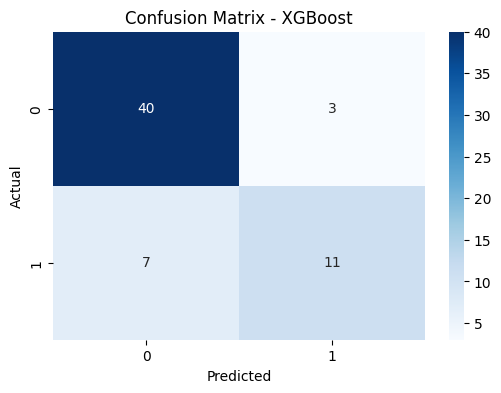


Training Decision Tree...

Decision Tree:
Accuracy: 0.6885245901639344
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        43
           1       0.47      0.39      0.42        18

    accuracy                           0.69        61
   macro avg       0.61      0.60      0.61        61
weighted avg       0.67      0.69      0.68        61

Confusion Matrix:
[[35  8]
 [11  7]]


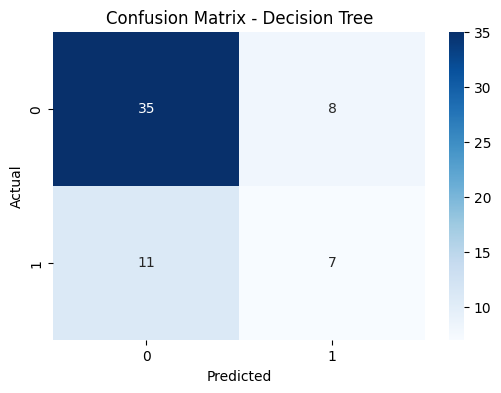

In [51]:
# Store results for comparison
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    
    # Print evaluation metrics
    print(f"\n{model_name}:")
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

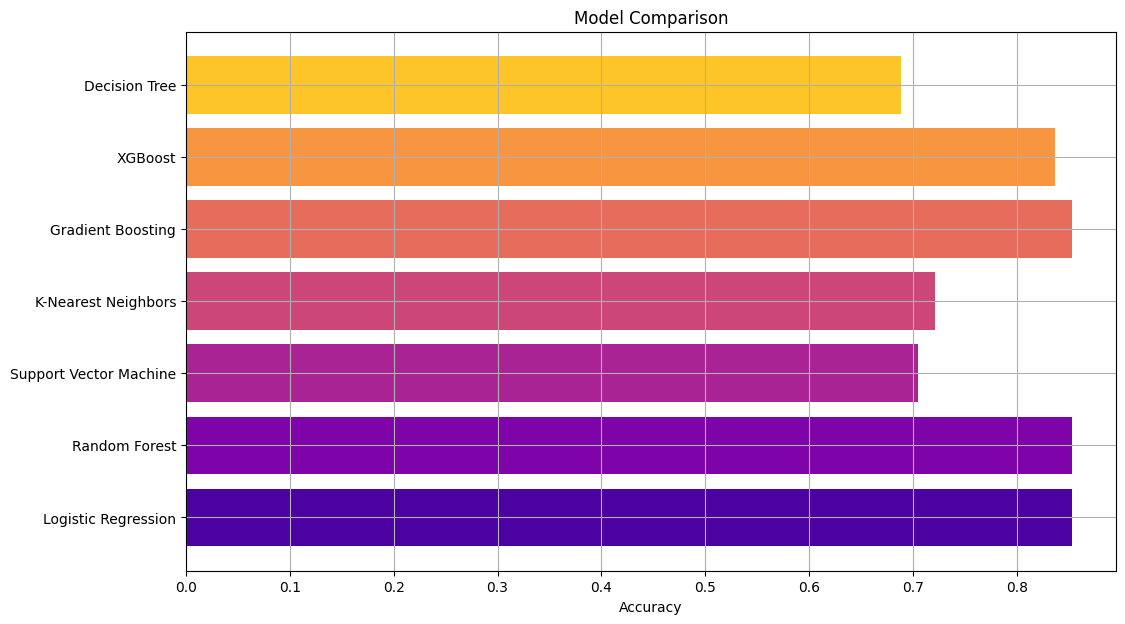

In [62]:
model_names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(12, 7))
palette = sns.color_palette("plasma", len(model_names)) #magma, plasma, inferno, cividis Blues, Greens, Oranges, Purples, Reds 
plt.barh(model_names, accuracies, color=palette)
plt.xlabel('Accuracy')
plt.title('Model Comparison')
plt.grid(True)
plt.show()

In [53]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [54]:
print(f"Accuracy: { accuracy_score(y_test, y_pred)}")

Accuracy: 0.7213114754098361


In [55]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [56]:
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [63]:
# Get best parameters and score
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best accuracy for Random Forest:", grid_rf.best_score_)

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best accuracy for Random Forest: 0.8801870748299319


In [64]:
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

Random Forest Test Accuracy: 0.8524590163934426
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        43
           1       0.85      0.61      0.71        18

    accuracy                           0.85        61
   macro avg       0.85      0.78      0.81        61
weighted avg       0.85      0.85      0.84        61



In [65]:
dt = DecisionTreeClassifier(random_state=42)

# Set up the parameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'splitter': ['best', 'random']
}

In [66]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 7, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [67]:
# Get the best model from grid search
best_dt = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}


In [68]:
y_pred = best_dt.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88        43
           1       0.73      0.61      0.67        18

    accuracy                           0.82        61
   macro avg       0.79      0.76      0.77        61
weighted avg       0.81      0.82      0.81        61

Accuracy on Test Set: 0.819672131147541


In [74]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

In [75]:
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 150],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [76]:

best_xgb = grid_search_xgb.best_estimator_
print("Best Hyperparameters (XGBoost):", grid_search_xgb.best_params_)
y_pred_xgb = best_xgb.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("Accuracy on Test Set (XGBoost):", accuracy_score(y_test, y_pred_xgb))

Best Hyperparameters (XGBoost): {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.6}

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90        43
           1       0.85      0.61      0.71        18

    accuracy                           0.85        61
   macro avg       0.85      0.78      0.81        61
weighted avg       0.85      0.85      0.84        61

Accuracy on Test Set (XGBoost): 0.8524590163934426


In [77]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(verbose=0, random_state=42)
param_grid_cb = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5]
}


In [78]:

grid_search_cb = GridSearchCV(estimator=catboost, param_grid=param_grid_cb, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search_cb.fit(X_train, y_train)

best_cb = grid_search_cb.best_estimator_
print("Best Hyperparameters (CatBoost):", grid_search_cb.best_params_)
y_pred_cb = best_cb.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred_cb))
print("Accuracy on Test Set (CatBoost):", accuracy_score(y_test, y_pred_cb))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters (CatBoost): {'depth': 8, 'iterations': 200, 'l2_leaf_reg': 5, 'learning_rate': 0.01}

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90        43
           1       0.85      0.61      0.71        18

    accuracy                           0.85        61
   macro avg       0.85      0.78      0.81        61
weighted avg       0.85      0.85      0.84        61

Accuracy on Test Set (CatBoost): 0.8524590163934426


In [79]:
gb = GradientBoostingClassifier(random_state=42)
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [80]:

grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)

best_gb = grid_search_gb.best_estimator_
print("Best Hyperparameters (Gradient Boosting):", grid_search_gb.best_params_)
y_pred_gb = best_gb.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print("Accuracy on Test Set (Gradient Boosting):", accuracy_score(y_test, y_pred_gb))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters (Gradient Boosting): {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        43
           1       0.79      0.61      0.69        18

    accuracy                           0.84        61
   macro avg       0.82      0.77      0.79        61
weighted avg       0.83      0.84      0.83        61

Accuracy on Test Set (Gradient Boosting): 0.8360655737704918


In [81]:

grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)

best_gb = grid_search_gb.best_estimator_
print("Best Hyperparameters (Gradient Boosting):", grid_search_gb.best_params_)
y_pred_gb = best_gb.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print("Accuracy on Test Set (Gradient Boosting):", accuracy_score(y_test, y_pred_gb))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters (Gradient Boosting): {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        43
           1       0.79      0.61      0.69        18

    accuracy                           0.84        61
   macro avg       0.82      0.77      0.79        61
weighted avg       0.83      0.84      0.83        61

Accuracy on Test Set (Gradient Boosting): 0.8360655737704918


In [86]:
svc = SVC(random_state=42)
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

In [88]:
grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search_svc.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [89]:
best_svc = grid_search_svc.best_estimator_
print("Best Hyperparameters (SVM):", grid_search_svc.best_params_)
y_pred_svc = best_svc.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred_svc))
print("Accuracy on Test Set (SVM):", accuracy_score(y_test, y_pred_svc))

Best Hyperparameters (SVM): {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        43
           1       0.79      0.61      0.69        18

    accuracy                           0.84        61
   macro avg       0.82      0.77      0.79        61
weighted avg       0.83      0.84      0.83        61

Accuracy on Test Set (SVM): 0.8360655737704918


In [90]:
knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [91]:
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [92]:
best_knn = grid_search_knn.best_estimator_
print("Best Hyperparameters (KNN):", grid_search_knn.best_params_)
y_pred_knn = best_knn.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("Accuracy on Test Set (KNN):", accuracy_score(y_test, y_pred_knn))

Best Hyperparameters (KNN): {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85        43
           1       0.67      0.56      0.61        18

    accuracy                           0.79        61
   macro avg       0.75      0.72      0.73        61
weighted avg       0.78      0.79      0.78        61

Accuracy on Test Set (KNN): 0.7868852459016393


In [95]:
lr = LogisticRegression(random_state=42, max_iter=2000)
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

In [96]:
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

best_lr = grid_search_lr.best_estimator_
print("Best Hyperparameters (Logistic Regression):", grid_search_lr.best_params_)
y_pred_lr = best_lr.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("Accuracy on Test Set (Logistic Regression):", accuracy_score(y_test, y_pred_lr))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been depre

Best Hyperparameters (Logistic Regression): {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92        43
           1       0.87      0.72      0.79        18

    accuracy                           0.89        61
   macro avg       0.88      0.84      0.85        61
weighted avg       0.88      0.89      0.88        61

Accuracy on Test Set (Logistic Regression): 0.8852459016393442
